## A Case study on  'Credit EDA' for Lending Company

## Problem Statement


### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants are capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a - inancial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios :


**The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

**All other cases:** All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

**Approved:** The Company has approved loan Application

**Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

**Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

**Unused offer:**  Loan has been cancelled by the client but on different stages of the process.

### Goal / Business Objective:

- Identify Patterns (KPIs) that indicate whether a client has tendency to show difficulties to pay installments which can lead some of the below possible outcomes:
    -- Deny Loan in case of applicants showing tendency to default payments
    -- Reduce the loan amount in case the applicants are not eligible for such applied loan.
    -- lend at higher rates of interests for customers / borrowers showing tendency to default (risk based pricing)
    

##### The Ultimate goal is to ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.


### References:
To solve this EDA case study, the following resources are refered upon: (only external sources noted)
1. https://en.wikipedia.org/wiki/Credit_risk
2. https://towardsdatascience.com/an-intro-to-data-science-for-credit-risk-modelling-57935805a911
3. https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb

#### Pre-requisites:
1. Ensure that the three data sets are present in same folder as the .ipynb file

### Risk Analytics (Concepts):

Risk Analytics is a domain of analysis of Risk in lending. Risk Analytics are applied from micro- to macro economic levels.
Concepts of Lending markets, credit scores etc. are required for one to be able to apply knowledge of Risk analysis.
This EDA case study may be aligned on principles of individual credit risk or more specifically, **'Counterparty Credit Risk'**

*** Notes for reference on given Dataset:***
1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

#### Step 0: Imports

In [1]:
#import the warnings.
import warnings
# just disable any warnings, for now.
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

`All other initialization goes here`

In [3]:
pd.set_option('display.max_rows', 500)

#### Step 1: Data Cleaning:

**Step 1.1: Load Datasets:**

In [4]:
new_appl = pd.read_csv('application_data.csv')

**Step 1.2: Inspect new application dataset**

In [5]:
# let us get the shape of the current application data set
new_appl.shape

(307511, 122)

- Inspection Process:
    - Inspect all columns having NULL values
    - Report on how to fill Nulls with either mean/ mode / zero based on the type of column and nature
    - Univariate Analysis
    - Check for Outliers.

In [6]:
#First get the shape
new_appl.shape

(307511, 122)

In [7]:
round(100. *(new_appl.isnull().sum() / len(new_appl.index)),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

**Step 1.3: Inspect for NULLs, imputation etc.**

- Inspect for Nulls and ways to Impute/ fill nulls
- Drop all the columns that have NULL values  > 50%

In [8]:
# dropna has a 'thresh' parameter which would mandate that for a row to survive
# a minimum of 'N' non-NULL values should be present for that axis / column variable.
# so, to retain columns with less than or equal to 50% NULLs, we need to specify a 
# threshold = 50%  so that column's total NULL % is less than 50%
new_appl.dropna(thresh=0.50 * len(new_appl.index), inplace=True, axis = 1)

**Step 1.4: Inspect Shape and Data types**

In [9]:
# let us get the shape of the current application data set
new_appl.shape

(307511, 81)

In [10]:
#let us look at getting an insight into the column and data types.!
new_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

***Remarks: Most of the columns look fine with respect to the data types,
there are no columns that appear to be loaded with mismatch datatype so no action to be taken***

In [11]:
#check the NULLs again!
round(100. *(new_appl.isnull().sum() / len(new_appl.index)),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

`Inspect for columns having null values ` <br>
`Identify what is the best way to Impute?`

**Step 1.5: Inspect if any values in the columns are unavailable, or NULL and report ways to impute proper value:**

##### Some Recommendation on handling Null values
- replace OCCUPATION_TYPE column which have a value np.nan with Mode indicating unknown category
- impute YEARS_BEGINEXPLUATATION_AVG, FLOORSMAX_AVG with Average values of respective columns as they are mean indicators
- impute YEARS_BEGINEXPLUATATION_MEDI, FLOORSMAX_MEDI with median as they are median indicators
- impute TOTALAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, FLOORSMAX_MODE, with MODE values as they are mode indicators
- EMERGENCYSTATE_MODE is a categorical variable and needs to be inspected for a proper value first, and then decided upon
- EXT_SOURCE_3 needs to be inspected and then decided
- EMERGENCYSTATE_MODE with its mode value

`Note: All the cells with code to impute actual values are commented as imputing is not recommended for this case study`<br>
`Only Recommendation are provided and the code were added for analysis and then commented out.`

In [12]:
# Occupation has about 31% of NULLLs, let us inspect the OCCUPATION TYPE
new_appl['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [13]:
new_appl['OCCUPATION_TYPE'].mode()

0    Laborers
dtype: object

In [14]:
#new_appl['OCCUPATION_TYPE'].replace(np.nan, "UNK", inplace=True)

In [15]:
# these are average value indicator column, fill it with mean value of respective columns
# Recommendation is to impute with mean,
# new_appl['YEARS_BEGINEXPLUATATION_AVG'].fillna(new_appl['YEARS_BEGINEXPLUATATION_AVG'].mean(), 
#                                                inplace=True)
# Recommendation is to impute with mean,
# new_appl['FLOORSMAX_AVG'].fillna(new_appl['FLOORSMAX_AVG'].mean(), 
#                                                inplace=True)

In [16]:
# new_appl['YEARS_BEGINEXPLUATATION_MEDI'].fillna(new_appl['YEARS_BEGINEXPLUATATION_MEDI'].median(), 
#                                                 inplace=True)
# new_appl['FLOORSMAX_MEDI'].fillna(new_appl['FLOORSMAX_MEDI'].median(),
#                                                 inplace=True)

In [17]:
# new_appl['TOTALAREA_MODE'].fillna(new_appl['TOTALAREA_MODE'].median(), 
#                                                 inplace=True)
# new_appl['YEARS_BEGINEXPLUATATION_MODE'].fillna(new_appl['YEARS_BEGINEXPLUATATION_MODE'].median(), 
#                                                 inplace=True)
# new_appl['FLOORSMAX_MODE'].fillna(new_appl['FLOORSMAX_MODE'].median(),
#                                                 inplace=True)

In [18]:
new_appl['EMERGENCYSTATE_MODE'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [19]:
new_appl['EMERGENCYSTATE_MODE'].value_counts(normalize=True)

No     0.985608
Yes    0.014392
Name: EMERGENCYSTATE_MODE, dtype: float64

In [20]:
#new_appl['EMERGENCYSTATE_MODE'].replace(np.nan, new_appl['EMERGENCYSTATE_MODE'].mode(), inplace=True)

In [21]:
#new_appl['EMERGENCYSTATE_MODE'].value_counts(normalize=True)

`Impute EXT_SOURCE_3 with a zero as this is a external source information which is normalized on scale of 0-1` <br>
`Impute EXT_SOURCE_2 with a zero as this is a external source information which is normalized on scale of 0-1`

In [22]:
#new_appl['EXT_SOURCE_2'].dtype

In [23]:
#new_appl.fillna((new_appl['EXT_SOURCE_3'].mean()),inplace=True)
#new_appl.fillna((new_appl['EXT_SOURCE_2'].mean()),inplace=True)


`For AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK` <br>
`AMT_REQ_CREDIT_BUREAU_MON fill Null with Zeros.`

In [24]:
# new_appl['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
# new_appl['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
# new_appl['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
# new_appl['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
# new_appl['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
# new_appl['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)

- Following columns still show some amount of null values:
    - OBS_30_CNT_SOCIAL_CIRCLE
    - DEF_30_CNT_SOCIAL_CIRCLE
    - OBS_60_CNT_SOCIAL_CIRCLE
    - DEF_60_CNT_SOCIAL_CIRCLE    <br>
  
  
`Recommend to fill with zeros [ impute zeros]`

In [25]:
# new_appl['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
# new_appl['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
# new_appl['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
# new_appl['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)

- For AMT_GOODS_PRICE impute the value of AMT_CREDIT as it is close match
- For NAME_TYPE_SUITE upon inspection

In [26]:
# new_appl['AMT_GOODS_PRICE'].fillna(new_appl['AMT_CREDIT'],inplace=True)

In [27]:
 new_appl['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [28]:
new_appl['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
dtype: object

In [29]:
# recommend to impute as Unaccompanied
#new_appl['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)

In [30]:
#check the NULLs again!
round(100. *(new_appl.isnull().sum() / len(new_appl.index)),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

`Application Dataset looks neat and tidy now, with no NULL values`<br> **[uncomment imputing code snippets]**

`let us inspect the gender column for inspection`

`The following below two variable are used for analysis, so we are planning to replace XNA with respective mode values or drop certain columns as it may impact our study`

In [31]:
new_appl['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

`XNA can be replaced with mode values?`

In [32]:
new_appl['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

`Recommendation: we can impute an XNA with 'F' as Female category is majority`

In [33]:
# let us do this as we may use Gender for further analysis.
#new_appl.loc[new_appl['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = 'F'

`let us inspect the ORGANIZATION_TYPE for XNA values?`

In [34]:
new_appl['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [35]:
# organization type also has Not Available (XNA) values, we may need to check how many of the columns are such
new_appl.loc[new_appl['ORGANIZATION_TYPE']== 'XNA','ORGANIZATION_TYPE'].count()

55374

In [36]:
new_appl.shape

(307511, 81)

In [37]:
# let us drop a total of 55374 rows
#new_appl = new_appl[new_appl['ORGANIZATION_TYPE'] != 'XNA']

In [38]:
new_appl.shape

(307511, 81)

In [39]:
# let us inspect the marital state
new_appl['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [40]:
#let us clean up a bit, let us mark Single/ not married as Single, Civil marriage as married
#new_appl['NAME_FAMILY_STATUS'].replace('Single / not married', 'Single',inplace=True)

In [41]:
new_appl['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [42]:
new_appl['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [43]:
#considering the split of civil marriage and married, it can be safe to rename civi marriage to married unless bank/ LC 
#tracks it for any other reason.
#new_appl['NAME_FAMILY_STATUS'].replace('Civil marriage','Married')

#### Reporting best metric to impute for 5 columns with less null percentages (<14), all other columns suggestion were given in above analysis:

###### 1. AMT_REQ_CREDIT_BUREAU --> MEDIAN
###### 2. AMT_GOODS_PRICE --> MEAN
###### 3. DEF_60_CNT_SOCIAL_CIRCLE --> MEDIAN
###### 4. DEF_60_CNT_SOCIAL_CIRCLE --> MEAN
###### 5. NAME_TYPE_SUITE (Categorical Variable) --> MODE


In [44]:
#AMT_REQ_CREDIT_BUREAU is numerical variable. There is outlier as maximum value for column is 25 while mean is 1. We wil use MEDIAN for imputing null values here.

new_appl.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [45]:
#AMT_GOODS_PRICE is numerical variable. We wil use MEAN for imputing null values here.

new_appl.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [46]:
#DEF_60_CNT_SOCIAL_CIRCLE is numerical variable. There is outlier as maximum value for column is around 24 while mean is 0.1. We wil use MEDIAN for imputing null values here.

new_appl.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [47]:
#DEF_60_CNT_SOCIAL_CIRCLE is numerical variable. We wil use MEAN for imputing null values here.

new_appl.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [48]:
#Name suite type is categorical variable. Null values can be imputed by Unaccompained as its frequency is highest (MODE) amongst the 7 unique values for the column:

new_appl.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [49]:
#Increasing columns that can be viewed and checking head to find negative value columns which are incorrect
pd.set_option('display.max_column',500)
new_appl.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


`Make the Days/Age relevant columns to absolute or non-negative`

In [50]:
#Correcting negative columns:
new_appl.loc[new_appl['DAYS_BIRTH']<0,'DAYS_BIRTH'] = new_appl.DAYS_BIRTH * -1
new_appl.loc[new_appl['DAYS_EMPLOYED']<0,'DAYS_EMPLOYED'] = new_appl.DAYS_EMPLOYED * -1
new_appl.loc[new_appl['DAYS_REGISTRATION']<0,'DAYS_REGISTRATION'] = new_appl.DAYS_REGISTRATION * -1
new_appl.loc[new_appl['DAYS_ID_PUBLISH']<0,'DAYS_ID_PUBLISH'] = new_appl.DAYS_ID_PUBLISH * -1
new_appl.loc[new_appl['DAYS_LAST_PHONE_CHANGE']<0,'DAYS_LAST_PHONE_CHANGE'] = new_appl.DAYS_LAST_PHONE_CHANGE * -1

In [51]:
#checking head again to confirm correction:
new_appl.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Outliers in numerical variables

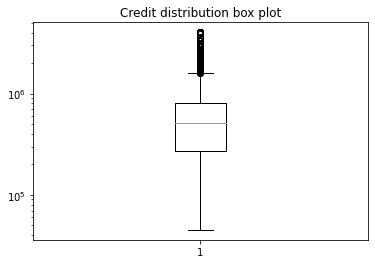

In [52]:
#Outliers present for AMT_CREDIT. Many values are outside the outer whiskers
plt.boxplot(new_appl['AMT_CREDIT'])
plt.title("Credit distribution box plot")
plt.yscale('log')
plt.show()


`There is an indication of outliers beyond the top whiskers` <br>
`Most of the borrowers / loan amount approved are in Quartile -1 lending which is below median` <br>
`let us also look at the 99th percentile and 100th percentile diff`

In [53]:
new_appl['AMT_CREDIT'].median()

513531.0

In [54]:
new_appl['AMT_CREDIT'].quantile([0.1,0.2,0.5,0.75,0.9,0.99,1.0])

0.10     180000.0
0.20     254700.0
0.50     513531.0
0.75     808650.0
0.90    1133748.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

`Clearly, the credit application upto 99th percentile is about 18L, the difference between 99th percentile and 100th percentile is very high, we may not conclude this as a outlier as it may be a business borrowing which is legitimate`

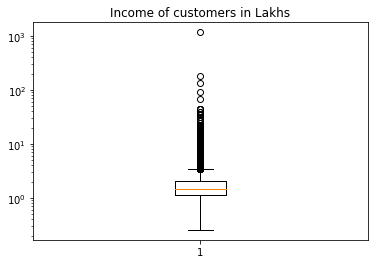

In [55]:
#Outliers present
plt.boxplot(new_appl['AMT_INCOME_TOTAL'] / 10 ** 5)
plt.title("Income of customers in Lakhs")
plt.yscale('log')
plt.show()


In [56]:
new_appl['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

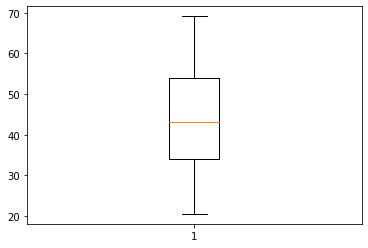

In [57]:
#No Outliers
plt.boxplot(new_appl['DAYS_BIRTH'] /365)
plt.show()


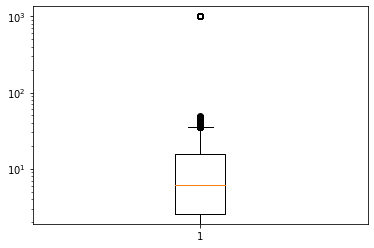

In [58]:
#Outliers present
plt.boxplot(new_appl['DAYS_EMPLOYED']/365)
plt.yscale('log')
plt.show()


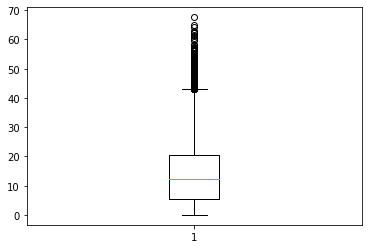

In [59]:
#Outliers present
plt.boxplot(new_appl['DAYS_REGISTRATION']/365)

plt.show()

`Days employed has outliers which are clearly visible, age of applicant and registration dates dont show it`

`The number of days of employement of the individual or entity appear to be spread evenly about the median`

**Step 1.8: Evaluate for binning and capping requirements**

In [60]:
# AMT_CREDIT: Inspect the Credit amount and bin them to buckets for analysis
new_appl['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [61]:
new_appl['AMT_CREDIT'].median()

513531.0

`This variable indicates the amount sanctioned against applied loan.
 clearly, the range is between 45k to 4050k. Let us bin the credit 
 column at 1L,5L, 10L, 40L,1Cr, 2Cr, 5Cr, 10Cr and above`


In [62]:
new_appl['AMT_CREDIT'].quantile([0.,0.1,0.25,0.5,0.75,0.99,1.0])

0.00      45000.0
0.10     180000.0
0.25     270000.0
0.50     513531.0
0.75     808650.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

`The difference between 99th percentile and 100th percentile is large.`

In [63]:
bins = [0, 100000,500000,1000000,4000000,10000000,50000000,1000000000]
buckets_credit = ['0-1000000','100000-500000','500001-1000000', '1000001-4000000','4000001-10000000','10000001-50000000','5000001+']

In [64]:
new_appl['CREDIT_BUCKET']=pd.cut(new_appl['AMT_CREDIT'],bins=bins,labels=buckets_credit)

In [65]:
new_appl['CREDIT_BUCKET'].value_counts()

100000-500000        143329
500001-1000000       108193
1000001-4000000       49975
0-1000000              6004
4000001-10000000         10
10000001-50000000         0
5000001+                  0
Name: CREDIT_BUCKET, dtype: int64

`Let us bin AMT_INCOME_TOTAL on similar lines`

In [66]:
new_appl['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [67]:
new_appl['AMT_INCOME_TOTAL'].median()

147150.0

In [68]:
new_appl['AMT_INCOME_TOTAL'].quantile([0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.95,0.99,1.0])

0.00        25650.0
0.10        81000.0
0.20        99000.0
0.30       112500.0
0.40       135000.0
0.50       147150.0
0.60       162000.0
0.70       180000.0
0.80       225000.0
0.90       270000.0
0.91       270000.0
0.92       292500.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

`The difference between 99th percentile and 100th percentile is large.`

In [69]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']


In [70]:
new_appl['INCOME_BUCKET']=pd.cut(new_appl['AMT_INCOME_TOTAL'],bins=bins,labels=slot)
new_appl['INCOME_BUCKET'].value_counts()

125000-150000       47890
100000-125000       43701
200000-225000       40797
75000,100000        39806
150000-175000       34663
175000-200000       29644
50000-75000         19375
250000-275000       12733
225000-250000        7340
300000-325000        6752
350000-375000        4537
25000-50000          4517
275000-300000        4306
425000-450000        3113
500000 and above     2702
325000-350000        2122
400000-425000        1811
375000-400000        1265
475000-500000         312
450000-475000         125
0-25000                 0
Name: INCOME_BUCKET, dtype: int64

In [71]:
new_appl.shape

(307511, 83)

**Step 1.7: Split the Dataframes based on TARGET**

In [72]:
new_appl['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [73]:
new_appl.shape

(307511, 83)

#### Imbalance percentage w.r.t Target Variable (for Target 0- 91.927%, for Target 1- 8.072%)

In [74]:
#Checking imbalance percentage
100. * new_appl['TARGET'].value_counts(normalize=True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [75]:
# split the dataset first
target0_df=new_appl.loc[new_appl["TARGET"]==0]
target1_df=new_appl.loc[new_appl["TARGET"]==1]

In [76]:
# calculate imbalance
round(len(target0_df)/len(target1_df),2)

11.39

`The imbalance ratio of clients with difficulties in payment v/s clients with no difficulties in payment is`<br>
**( 1 : 11.39 )**

**Step 2: Outliers, Univariate, Multivariate analysis for Target 0 and Target 1 Datasets:**

`Step 2.1: Does having more children show tendency to default?`

`Let us define all chat functions, here`

In [77]:
target0_df['CNT_CHILDREN'].describe()

count    282686.000000
mean          0.412946
std           0.718843
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [78]:
target0_df['CNT_CHILDREN'].quantile([0.5,0.7,0.9,0.95,0.99, 1.0])

0.50     0.0
0.70     0.0
0.90     1.0
0.95     2.0
0.99     3.0
1.00    19.0
Name: CNT_CHILDREN, dtype: float64

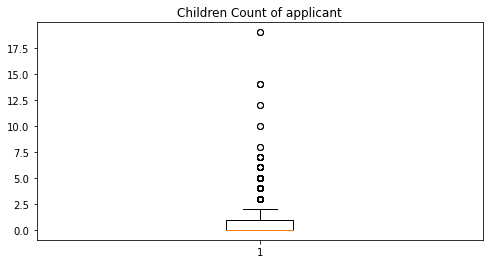

In [79]:
plt.figure(figsize=[8,4])
plt.boxplot(target0_df['CNT_CHILDREN'].astype(int))
plt.title('Children Count of applicant')
plt.show()

In [80]:
target1_df['CNT_CHILDREN'].describe()

count    24825.000000
mean         0.463807
std          0.756903
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         11.000000
Name: CNT_CHILDREN, dtype: float64

In [81]:
target1_df['CNT_CHILDREN'].quantile([0.5,0.7,0.9,0.95,0.99, 1.0]).astype(int)

0.50     0
0.70     1
0.90     2
0.95     2
0.99     3
1.00    11
Name: CNT_CHILDREN, dtype: int32

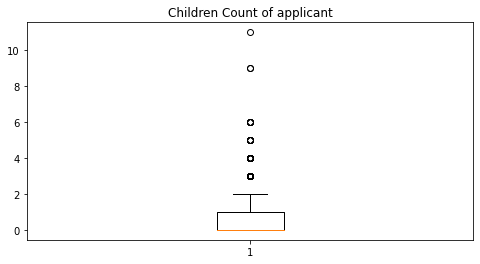

In [82]:
plt.figure(figsize=[8,4])
plt.boxplot(target1_df['CNT_CHILDREN'])
plt.title('Children Count of applicant')
plt.show()

`Remarks: Not conclusive that more the children, the relative is defaulter probability`

`From the plot, it is visible that the Q3 is bigger, indicating that the majority of applicants have children from 3rd Quartile about 1`

`Step 2.2: Inspect Income and also inspect if income impacts defaulters`

In [83]:
target0_df['AMT_INCOME_TOTAL'].quantile([0.5,0.7,0.9,0.95,0.99, 1.0])

0.50      148500.0
0.70      185400.0
0.90      270000.0
0.95      337500.0
0.99      486000.0
1.00    18000090.0
Name: AMT_INCOME_TOTAL, dtype: float64

`Remarks: Clearly, the difference between 99th Quantile to 100th Pretty high and this is a indicator of outlier`

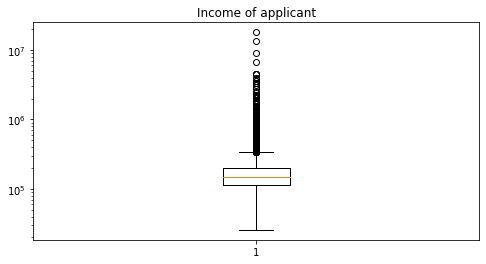

In [84]:
plt.figure(figsize=[8,4])
plt.yscale('log')
plt.boxplot(target0_df['AMT_INCOME_TOTAL'])
plt.title('Income of applicant')
plt.show()

`Appears like even distribution of borrowers between Q1 and Q3`

In [85]:
target1_df['AMT_INCOME_TOTAL'].describe()

count    2.482500e+04
mean     1.656118e+05
std      7.466770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

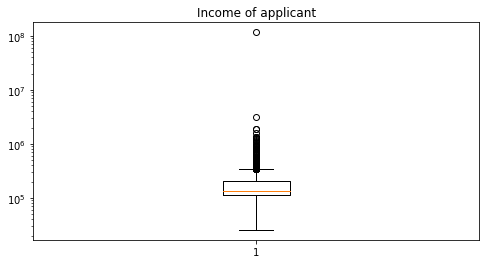

In [86]:
plt.figure(figsize=[8,4])
plt.yscale('log')
plt.boxplot(target1_df['AMT_INCOME_TOTAL'])
plt.title('Income of applicant')
plt.show()

`Early Remarks: The Customers having difficulties to pay appear to be prominent in third quartile [Q3]` <br>
`Outliers / values out of the top whiskers could indicate the total borrowers who have payment difficulties with huge income!`

In [87]:
target0_df['AMT_CREDIT'].describe()

count    2.826860e+05
mean     6.026483e+05
std      4.068459e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.177880e+05
75%      8.100000e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [88]:
target0_df['AMT_CREDIT'].quantile([0.5,0.7,0.9,0.95,0.99, 1.0])

0.50     517788.0
0.70     755190.0
0.90    1157670.0
0.95    1350000.0
0.99    1886850.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [89]:
target0_df['AMT_CREDIT'].median()

517788.0

`Again: there is a difference from 99th percentile to 100th percentile.`

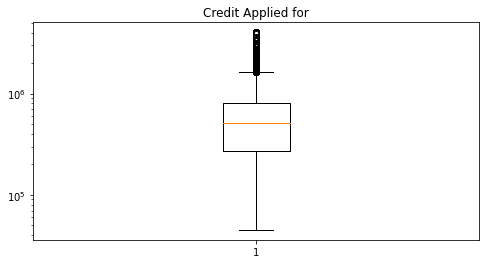

In [90]:
plt.figure(figsize=[8,4])
plt.yscale('log')
plt.boxplot(target0_df['AMT_CREDIT'])
plt.title('Credit Applied for')
plt.show()

`Early Remarks: more Credit Payouts are concentrated around median` <br>
`Outliers exist in credit Amount`

In [91]:
target1_df['AMT_CREDIT'].describe()

count    2.482500e+04
mean     5.577785e+05
std      3.464332e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.975200e+05
75%      7.333155e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64

In [92]:
target1_df['AMT_CREDIT'].quantile([0.5,0.7,0.9,0.95,0.99, 1.0])

0.50     497520.00
0.70     675000.00
0.90    1042560.00
0.95    1256400.00
0.99    1711340.64
1.00    4027680.00
Name: AMT_CREDIT, dtype: float64

In [93]:
target1_df['AMT_CREDIT'].median()

497520.0

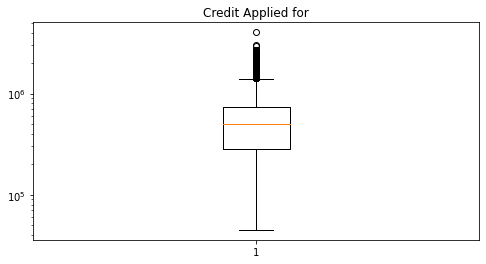

In [94]:
plt.figure(figsize=[8,4])
plt.yscale('log')
plt.boxplot(target1_df['AMT_CREDIT'])
plt.title('Credit Applied for')
plt.show()

`Univariate Analysis on Categorical variables:` <br>

`Education Type for target0 and target1` [possible inference: spread of Loan borrowings v/s education]

In [95]:
target0_df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64

In [96]:
target0_df.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.9021
Revolving loans    0.0979
Name: NAME_CONTRACT_TYPE, dtype: float64

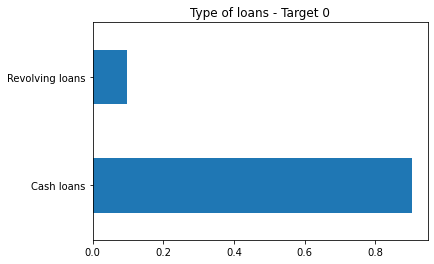

In [97]:
target0_df.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()
plt.title("Type of loans - Target 0")
plt.show()

In [98]:
target1_df.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.935388
Revolving loans    0.064612
Name: NAME_CONTRACT_TYPE, dtype: float64

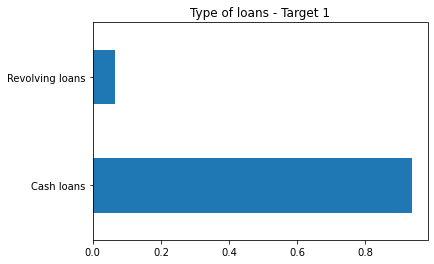

In [99]:
target1_df.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()
plt.title("Type of loans - Target 1")
plt.show()

**Early Remarks:**
- Cash Loans are promient (indicating that there are more 'one off loans' which are applied by individuals or entities)
- Revolving loans are lesser than 20% in both cases indicating that there are very few loans that are borrowed as revolving
- A key indicator could be a business or entity borrowing which  opted revolving loans.
- There are defaults in revolving loans also which could be a indicator that the individual or entity is not doing great at business
- prominently, the cash loans seem to have been defaulted more

In [100]:
#Variable shows same behavior for both targets

In [101]:
target0_df.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.810722
Family             0.131953
Spouse, partner    0.037216
Children           0.010751
Other_B            0.005670
Other_A            0.002807
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

In [102]:
target1_df.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.821531
Family             0.121551
Spouse, partner    0.036154
Children           0.009735
Other_B            0.007029
Other_A            0.003070
Group of people    0.000929
Name: NAME_TYPE_SUITE, dtype: float64

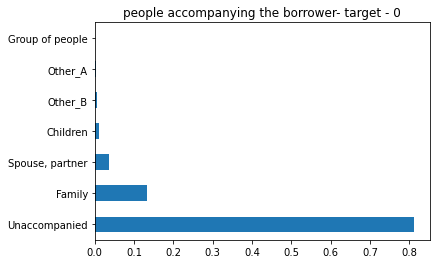

In [103]:
target0_df.NAME_TYPE_SUITE.value_counts(normalize=True).plot.barh()
plt.title('people accompanying the borrower- target - 0')
plt.show()

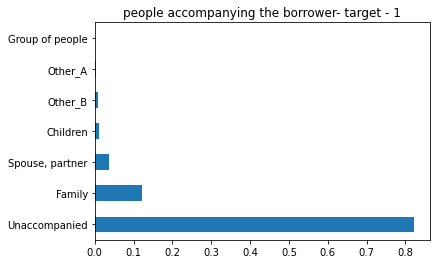

In [104]:
target1_df.NAME_TYPE_SUITE.value_counts(normalize=True).plot.barh()
plt.title('people accompanying the borrower- target - 1')
plt.show()

`Need not consider this as a factor for our analysis`

`No conclusive information about who accompanies the loan applicant. Not an important factor`

In [105]:
#3. NAME_INCOME_TYPE

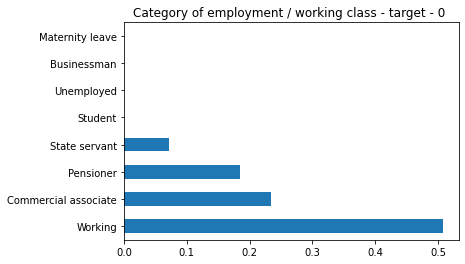

In [106]:
target0_df.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('Category of employment / working class - target - 0 ')
plt.show()

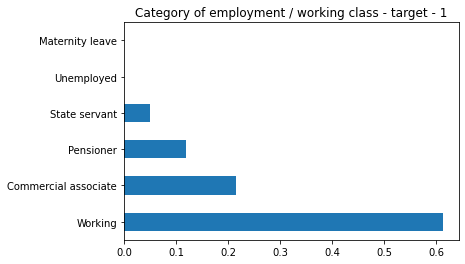

In [107]:
target1_df.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('Category of employment / working class - target - 1')
plt.show()

`Indicative that the working class is a prominent borrower in both files, i.e. the dataset of customers having problem to repay and those who do not have problems to repay`

In [108]:
#Students and businessmen have more chance of loan conversion.

In [109]:
#4. NAME_FAMILY_STATUS

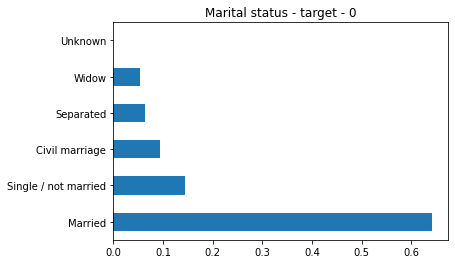

In [110]:
target0_df.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('Marital status - target - 0')
plt.show()

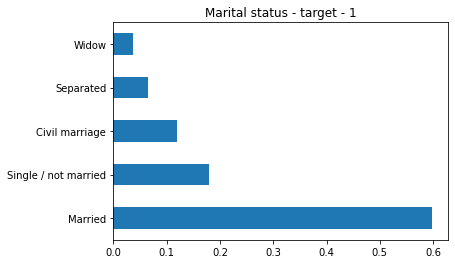

In [111]:
target1_df.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('Marital status - target - 1')
plt.show()

`Indicative that that married applicants followed by single applicants are prominent borrowers in the application`

In [112]:
#5. OCCUPATION_TYPE

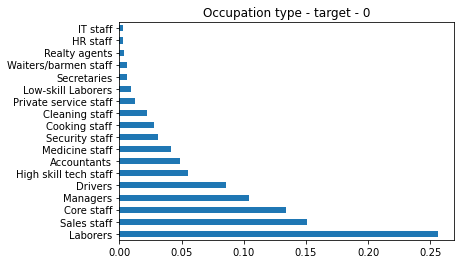

In [113]:
target0_df.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.title('Occupation type - target - 0')
plt.show()

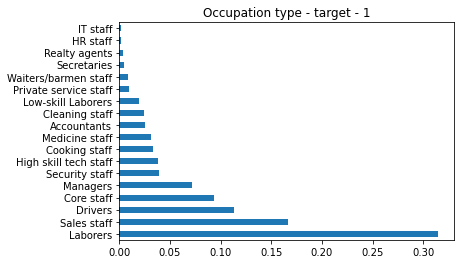

In [114]:
target1_df.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.title('Occupation type - target - 1')
plt.show()

`Working class and that too laborers are prominent category of borrowers in the LC. in both cases` <br>
`Observation is that more loans are refused/rejected for laborers` <br>


`Gender  for target0 and target1 [possible inference: spread of gender based borrowings]`

In [115]:
new_appl['CODE_GENDER'].describe()

count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object

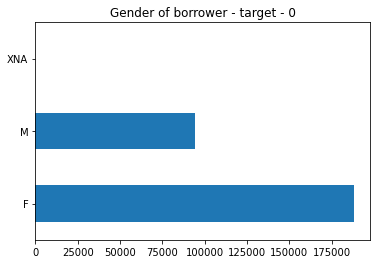

In [116]:
target0_df['CODE_GENDER'].value_counts().plot.barh()
plt.title('Gender of borrower - target - 0')
plt.show()

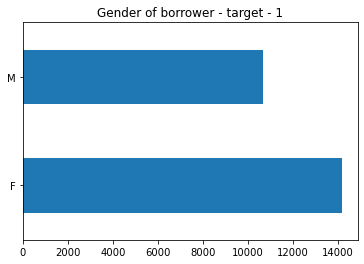

In [117]:
target1_df['CODE_GENDER'].value_counts().plot.barh()
plt.title('Gender of borrower - target - 1')
plt.show()

`Data shows that the gender of the applicant is more frequent for female category`<br>
`Also, Female borrowers tend to show more difficulties in paying EMIs`

`Contract type for target0 and target1 [possible inference: spread of contract type]`

`Univatiate analysis on Education`

In [118]:
target0_df.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.703491
Higher education                 0.250646
Incomplete higher                0.033270
Lower secondary                  0.012024
Academic degree                  0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64

In [119]:
target1_df.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.786465
Higher education                 0.161490
Incomplete higher                0.035126
Lower secondary                  0.016798
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

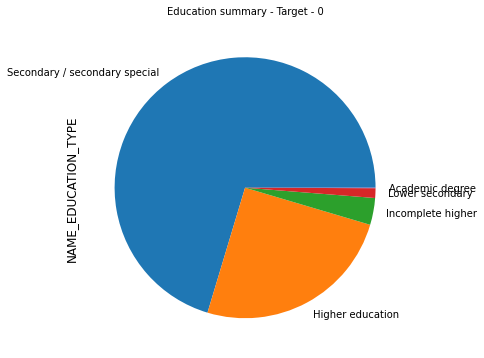

In [120]:
#plot the pie chart of education categories
plt.figure(figsize=[6,6])
plt.rcParams["axes.labelsize"] = 12
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.titlepad'] = 10
target0_df.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.title("Education summary - Target - 0")
plt.show()

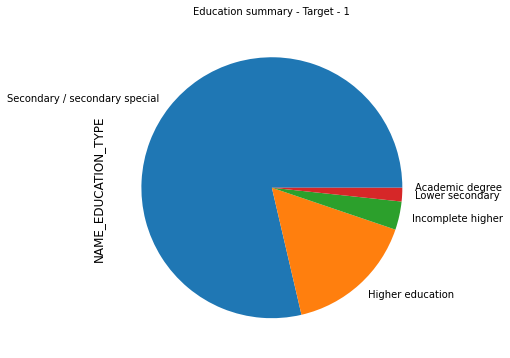

In [121]:
plt.figure(figsize=[6,6])
plt.rcParams["axes.labelsize"] = 12
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.titlepad'] = 10
target1_df.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.title("Education summary - Target - 1")
plt.show()

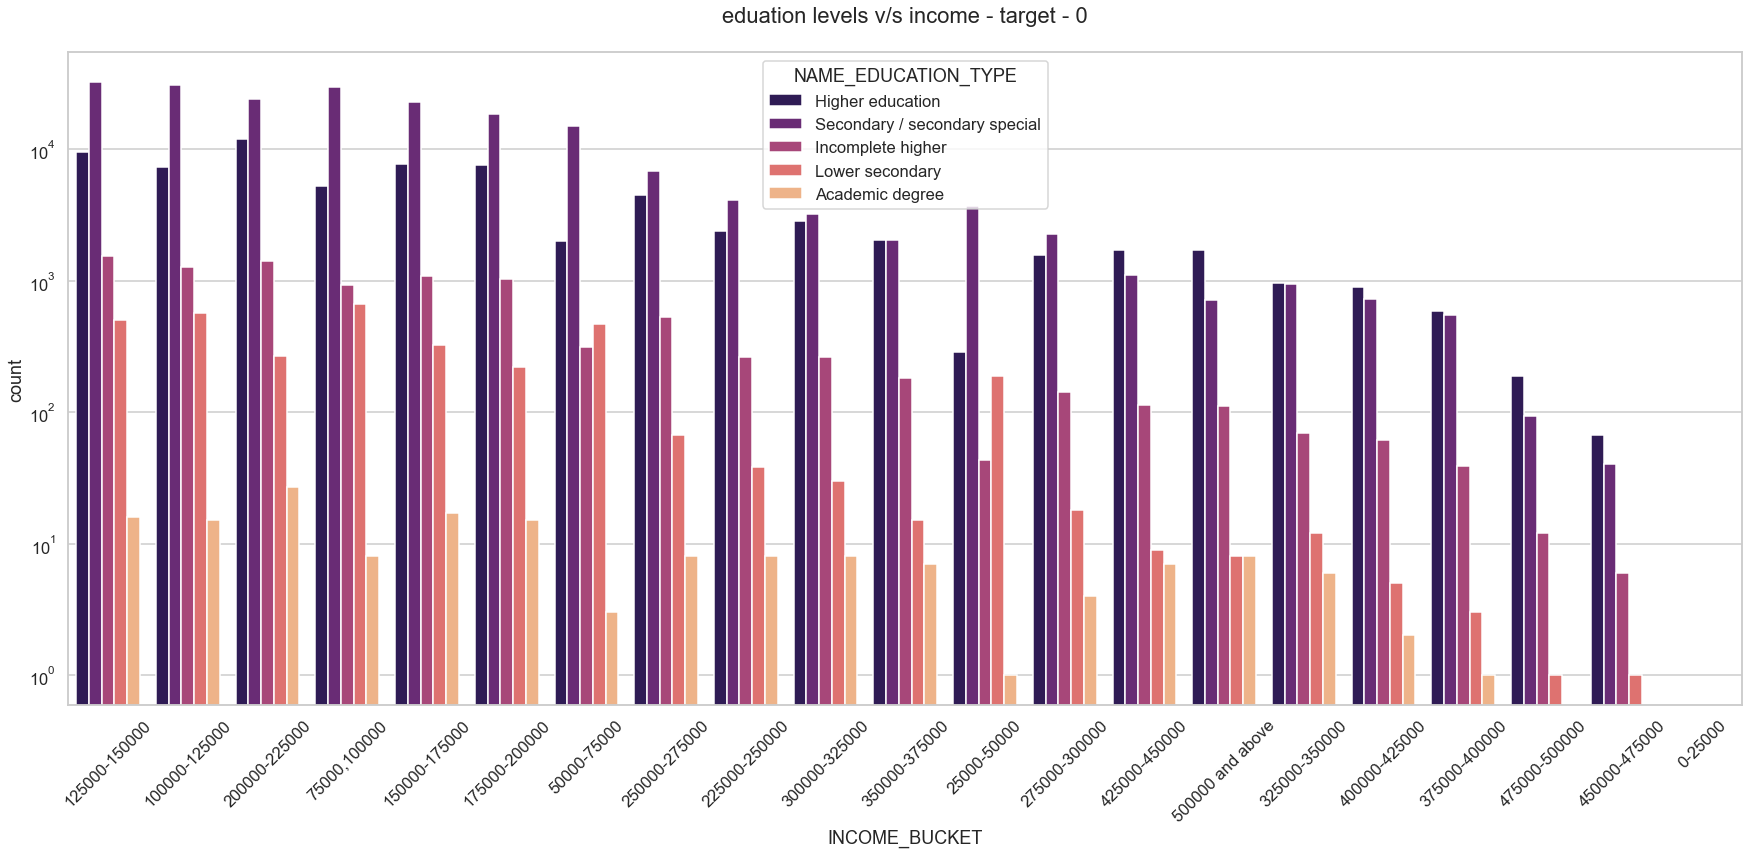

In [122]:
#get a distribution of gender v/s income spread
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=[30,12])
plt.xticks(rotation=45)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.yscale('log')
sns.countplot(data = target0_df, x= 'INCOME_BUCKET', 
              order=target0_df['INCOME_BUCKET'].value_counts().index,hue = 'NAME_EDUCATION_TYPE',palette='magma') 
plt.title("eduation levels v/s income - target - 0")
plt.show()

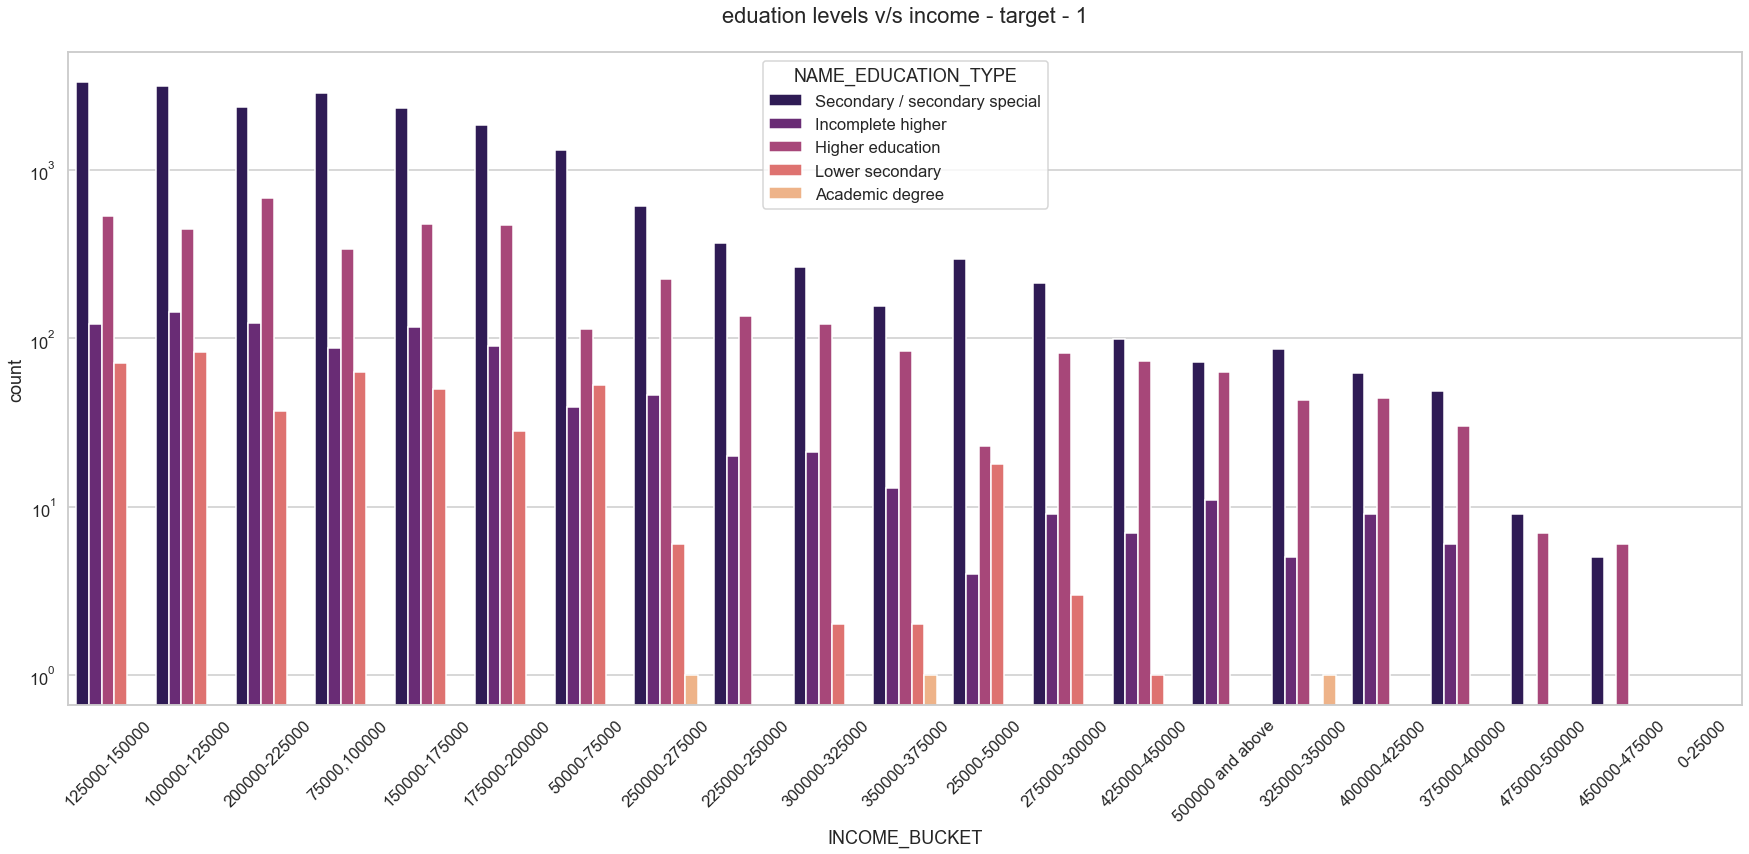

In [123]:
#get a distribution of gender v/s income spread
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=[30,12])
plt.xticks(rotation=45)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.yscale('log')
sns.countplot(data = target1_df, x= 'INCOME_BUCKET', 
              order=target0_df['INCOME_BUCKET'].value_counts().index,hue = 'NAME_EDUCATION_TYPE',palette='magma') 
plt.title("eduation levels v/s income - target - 1")
plt.show()

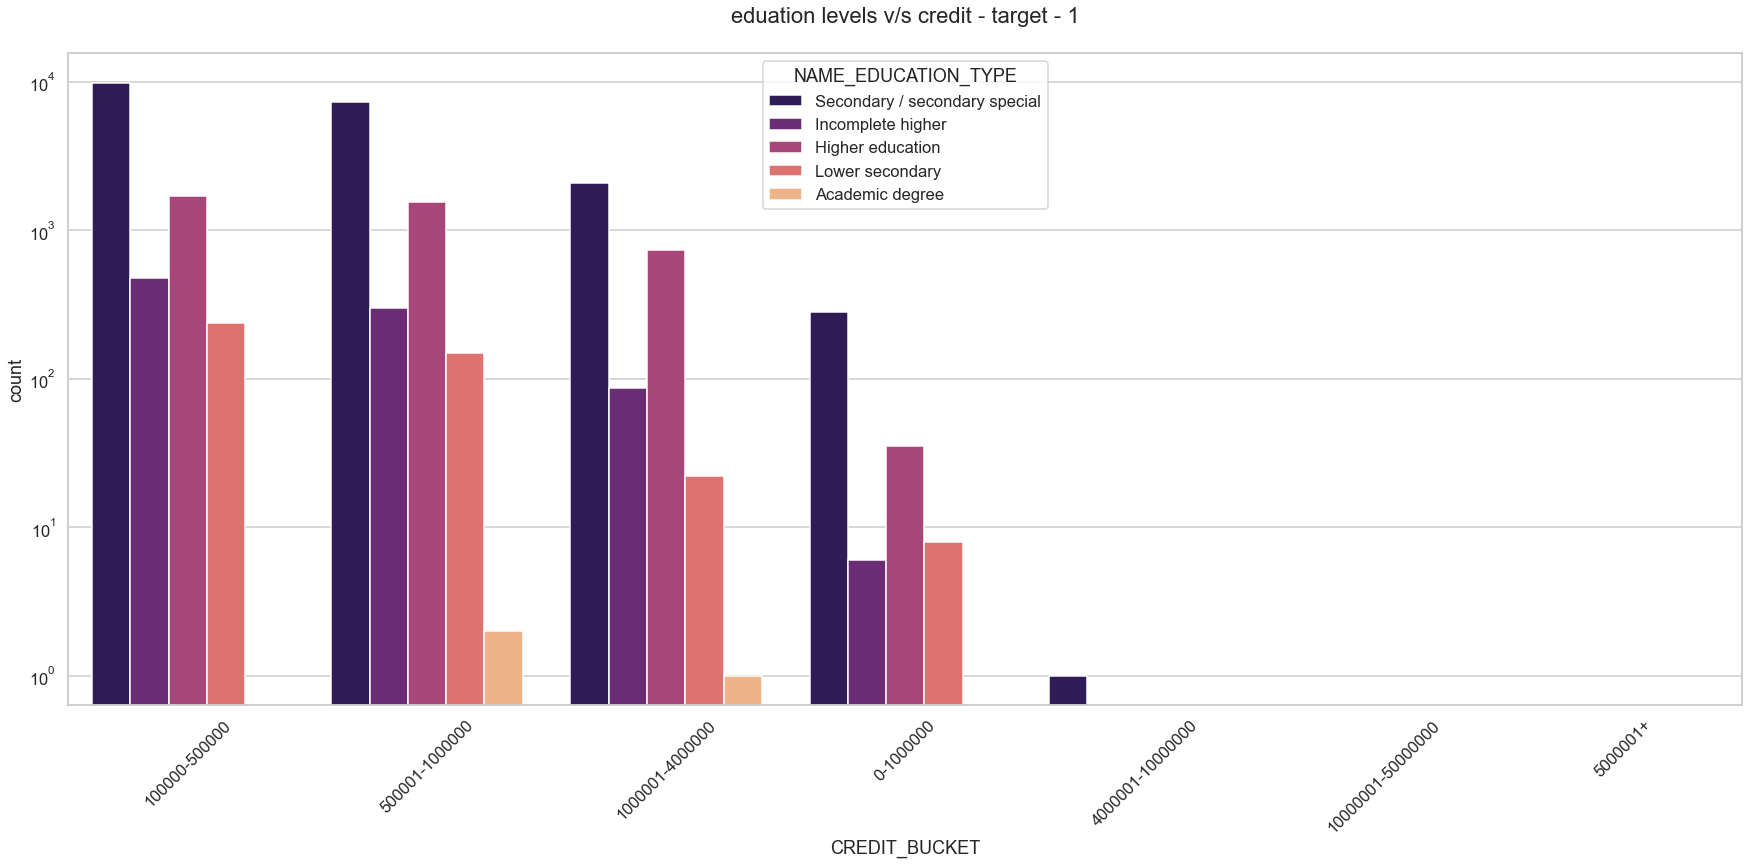

In [124]:
#get a distribution of gender v/s income spread
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=[30,12])
plt.xticks(rotation=45)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.yscale('log')
sns.countplot(data = target1_df, x= 'CREDIT_BUCKET', 
              order=target0_df['CREDIT_BUCKET'].value_counts().index,hue = 'NAME_EDUCATION_TYPE',palette='magma') 
plt.title("eduation levels v/s credit - target - 1")
plt.show()

`This is alarming, a secondard educated working class customer is mostly defaulting whose income is between 1.25 - 1.5L . but looking at the credits the secondary educated class show a highest number of borrowings in range of 10L - 50L. this could mean that the secondary educated class with working profession may have been provided higher loans than they can afford to repay.`

`borrowers are predominantly from Secondary educated background` <br>
`followed by higher education background`

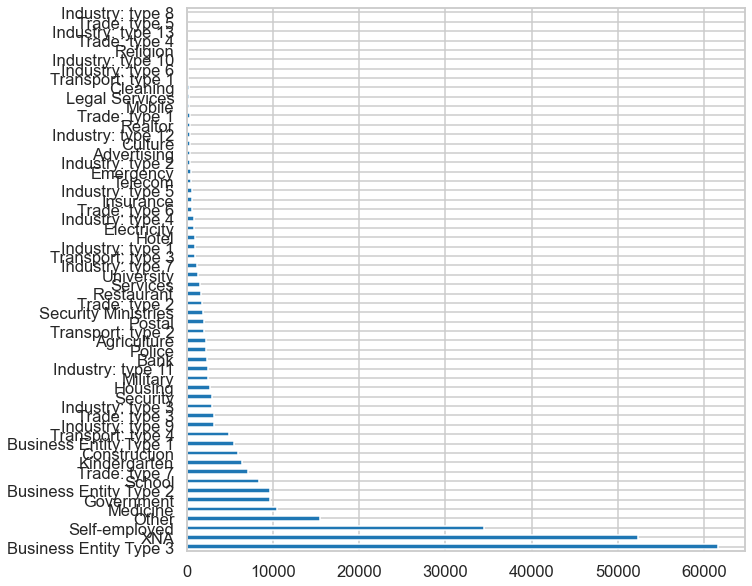

In [125]:
plt.figure(figsize=[10,10])
target0_df['ORGANIZATION_TYPE'].value_counts().plot.barh()
plt.show()

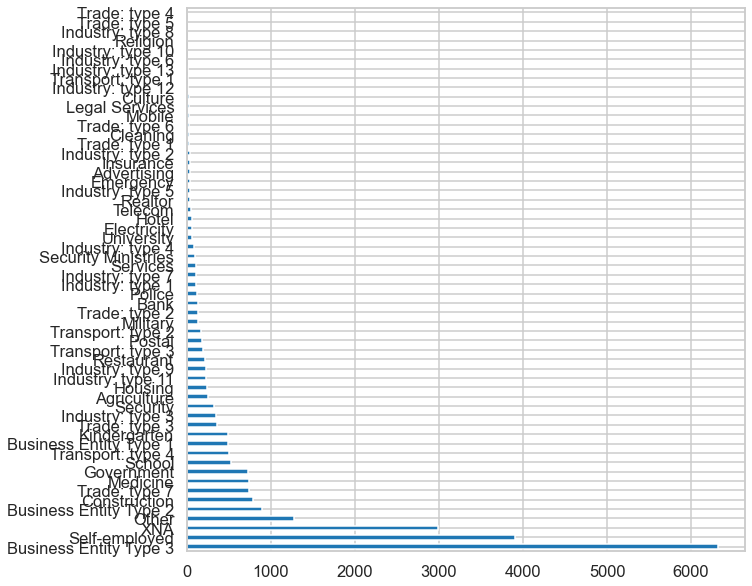

In [126]:
plt.figure(figsize=[10,10])
target1_df['ORGANIZATION_TYPE'].value_counts().plot.barh()
plt.show()

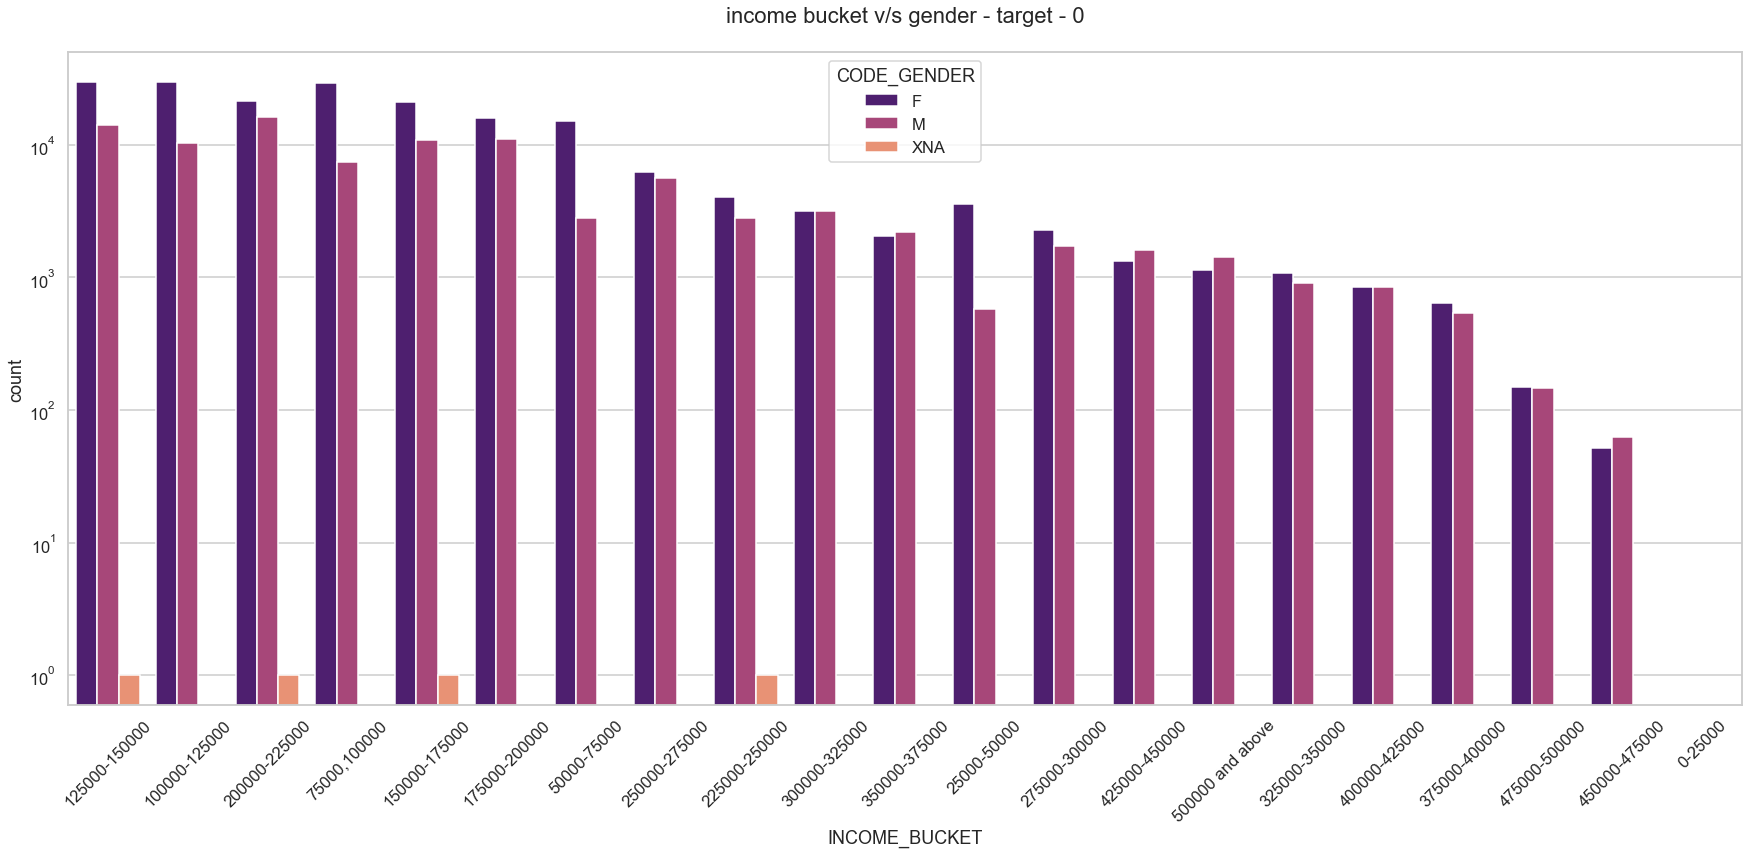

In [127]:
#get a distribution of gender v/s income spread
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=[30,12])
plt.xticks(rotation=45)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.yscale('log')
sns.countplot(data = target0_df, x= 'INCOME_BUCKET', 
              order=target0_df['INCOME_BUCKET'].value_counts().index,hue = 'CODE_GENDER',palette='magma') 
plt.title("income bucket v/s gender - target - 0")
plt.show()

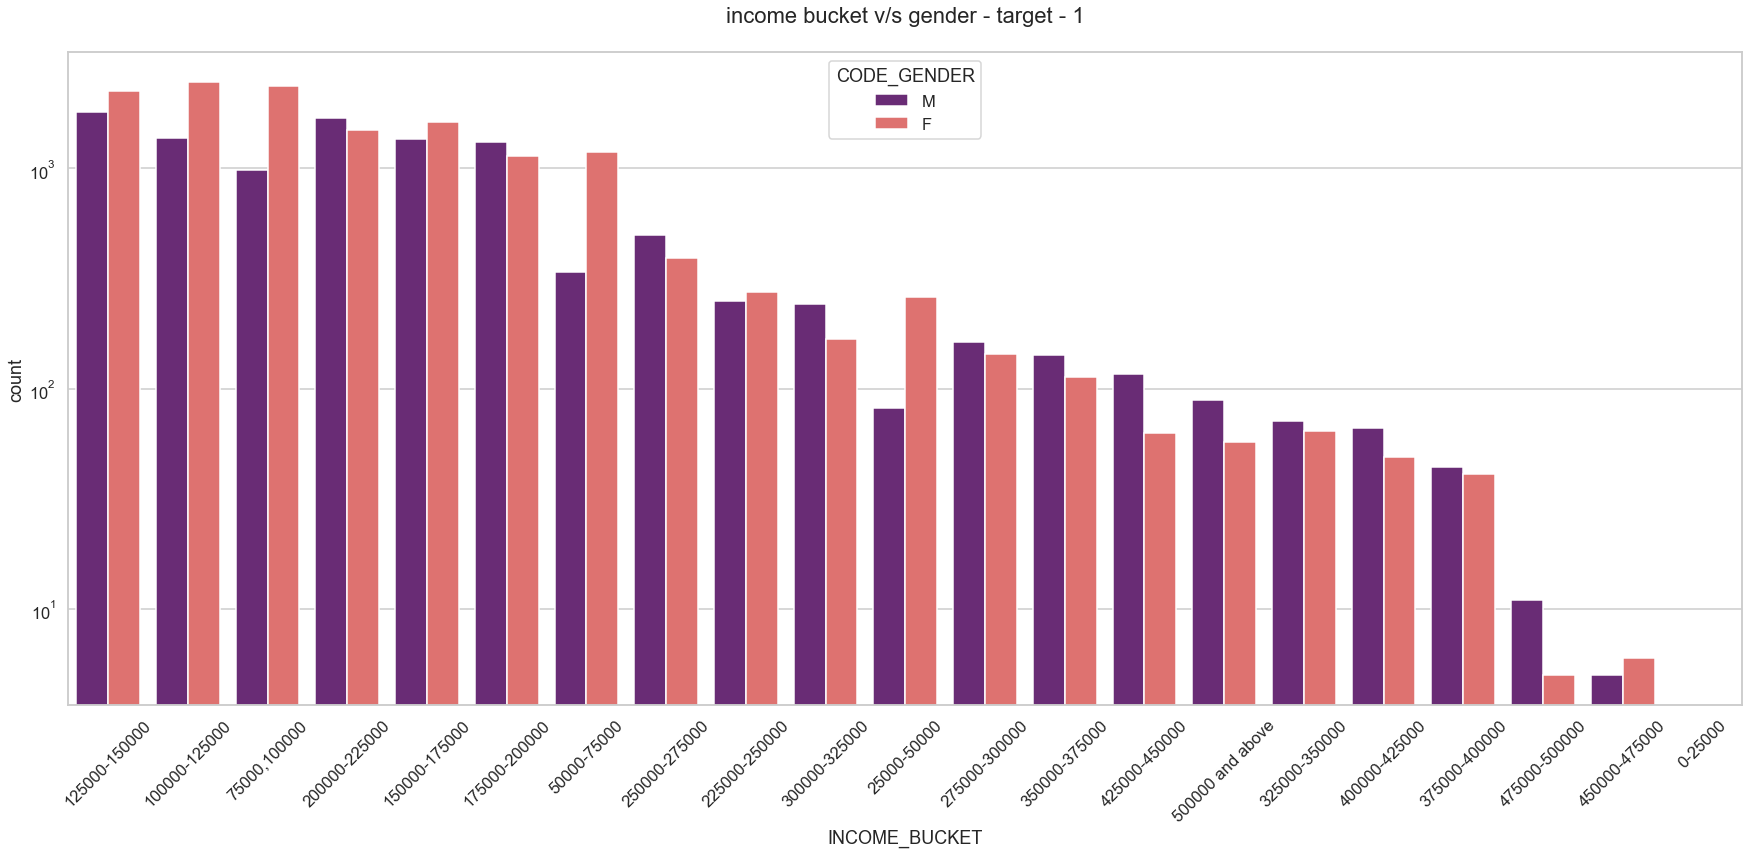

In [128]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=[30,12])
plt.xticks(rotation=45)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.yscale('log')
sns.countplot(data = target1_df, x= 'INCOME_BUCKET', 
              order=target1_df['INCOME_BUCKET'].value_counts().index,hue = 'CODE_GENDER',palette='magma') 
plt.title("income bucket v/s gender - target - 1")
plt.show()

`Income range 1.25 L to 1.5 L has more borrowings` <br>
`Female count is more than Male count in both targets`

`Distribution of contract type v/s gender`

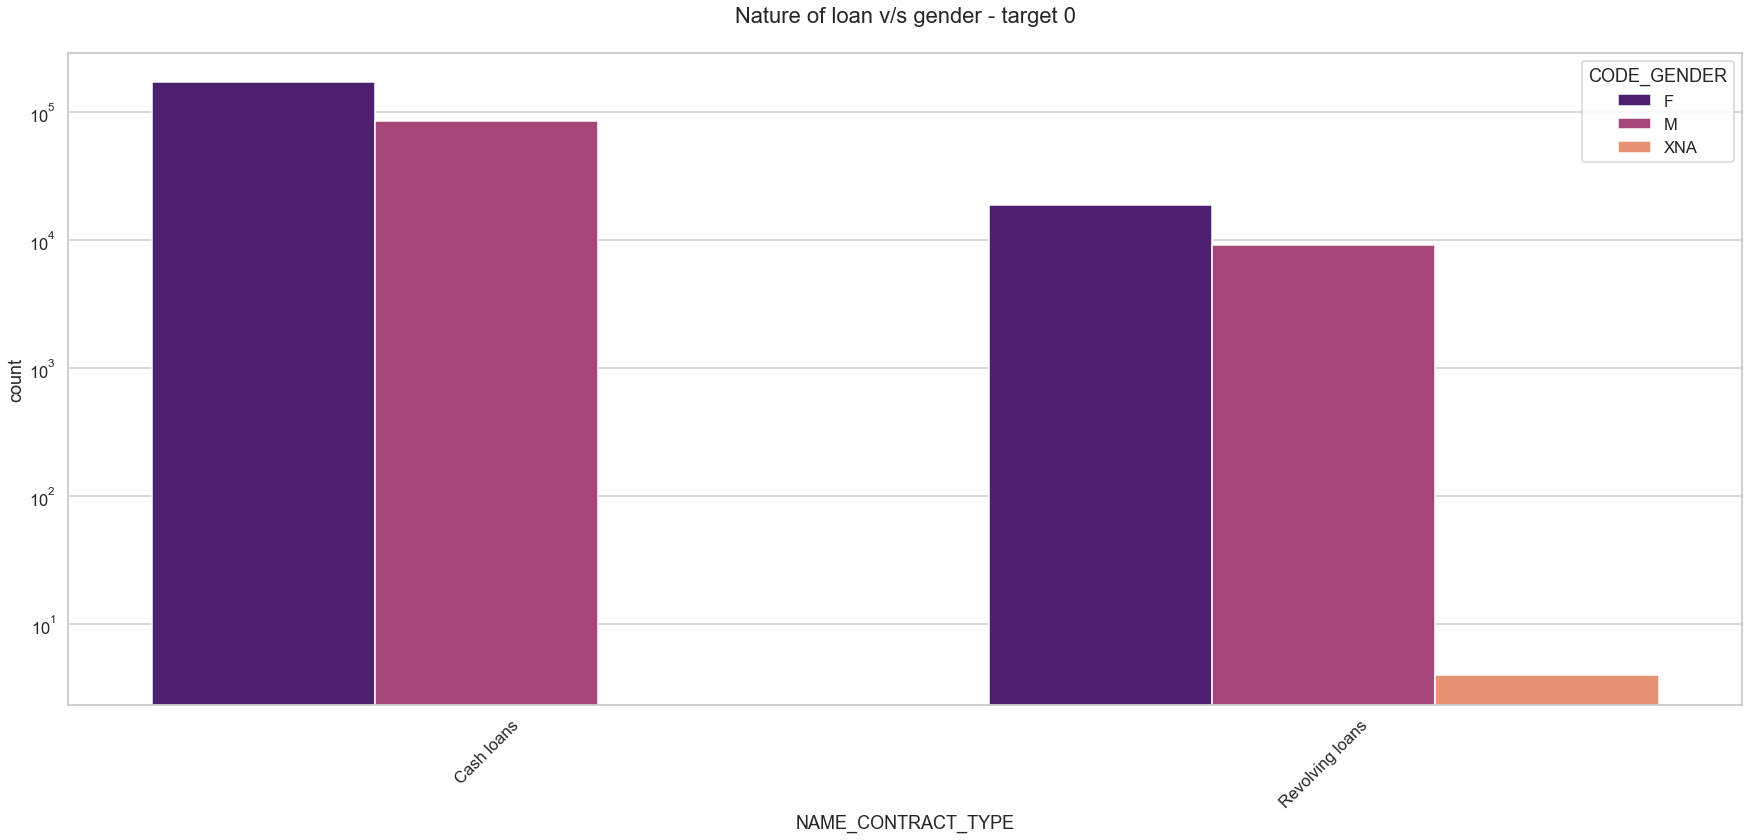

In [129]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=[30,12])
plt.xticks(rotation=45)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.yscale('log')
sns.countplot(data = target0_df, x= 'NAME_CONTRACT_TYPE', 
              order=target0_df['NAME_CONTRACT_TYPE'].value_counts().index,hue = 'CODE_GENDER',palette='magma') 
plt.title('Nature of loan v/s gender - target 0')
plt.show()

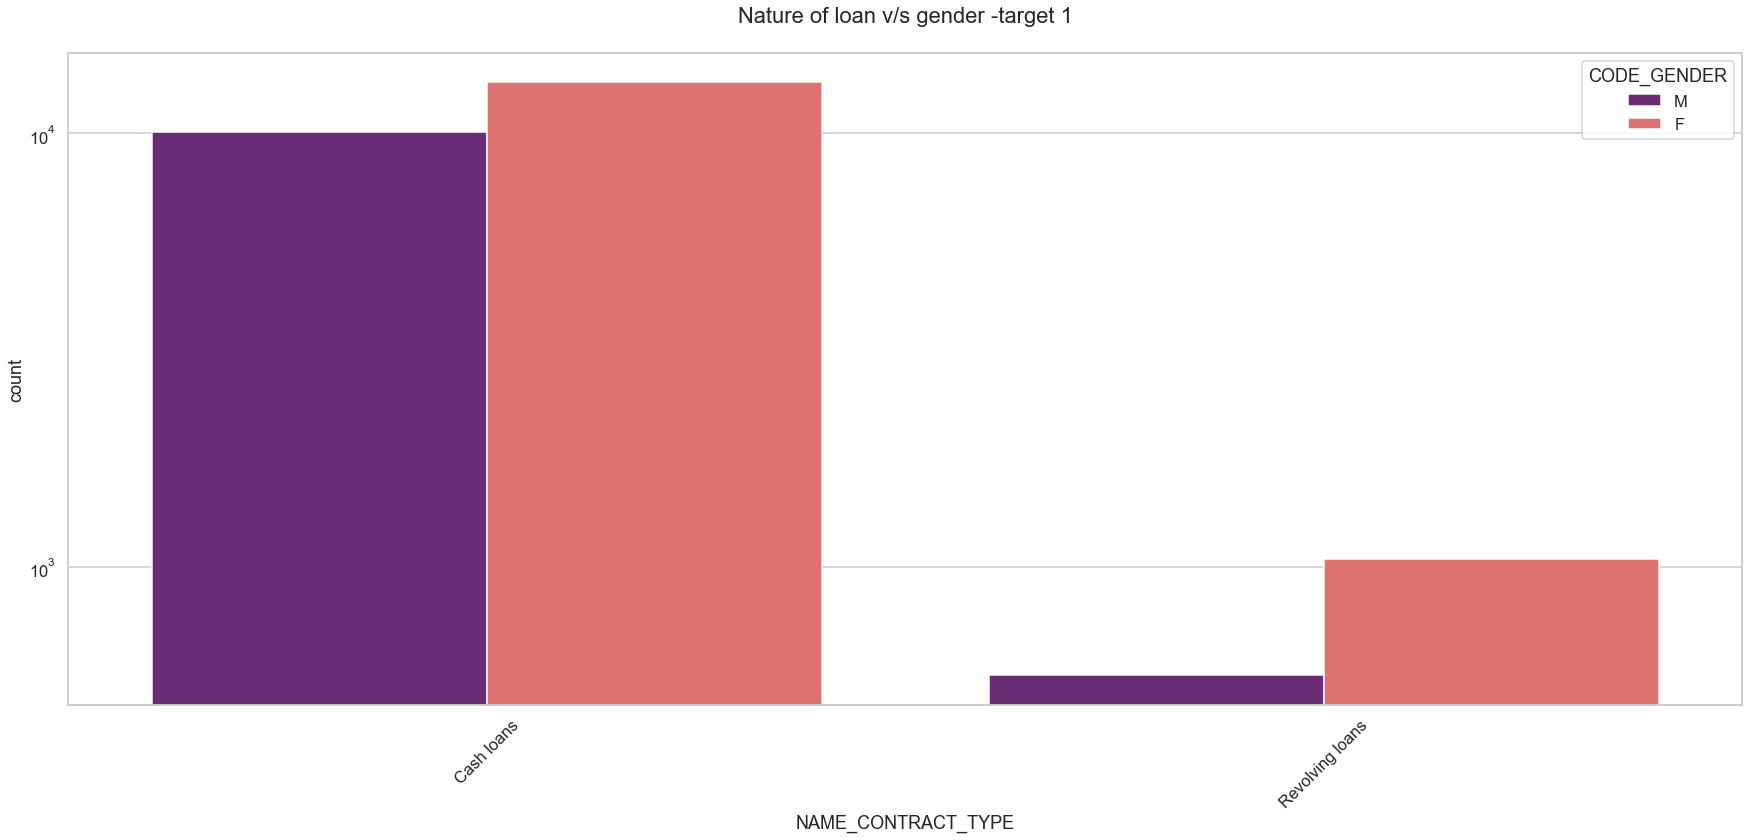

In [130]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=[30,12])
plt.xticks(rotation=45)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.yscale('log')
sns.countplot(data = target1_df, x= 'NAME_CONTRACT_TYPE', 
              order=target1_df['NAME_CONTRACT_TYPE'].value_counts().index,hue = 'CODE_GENDER',palette='magma')
plt.title('Nature of loan v/s gender -target 1')
plt.show()

`Looking at the distribution of loan type availed, it is evident that cash loan borrowers are more and has more female defaulters`

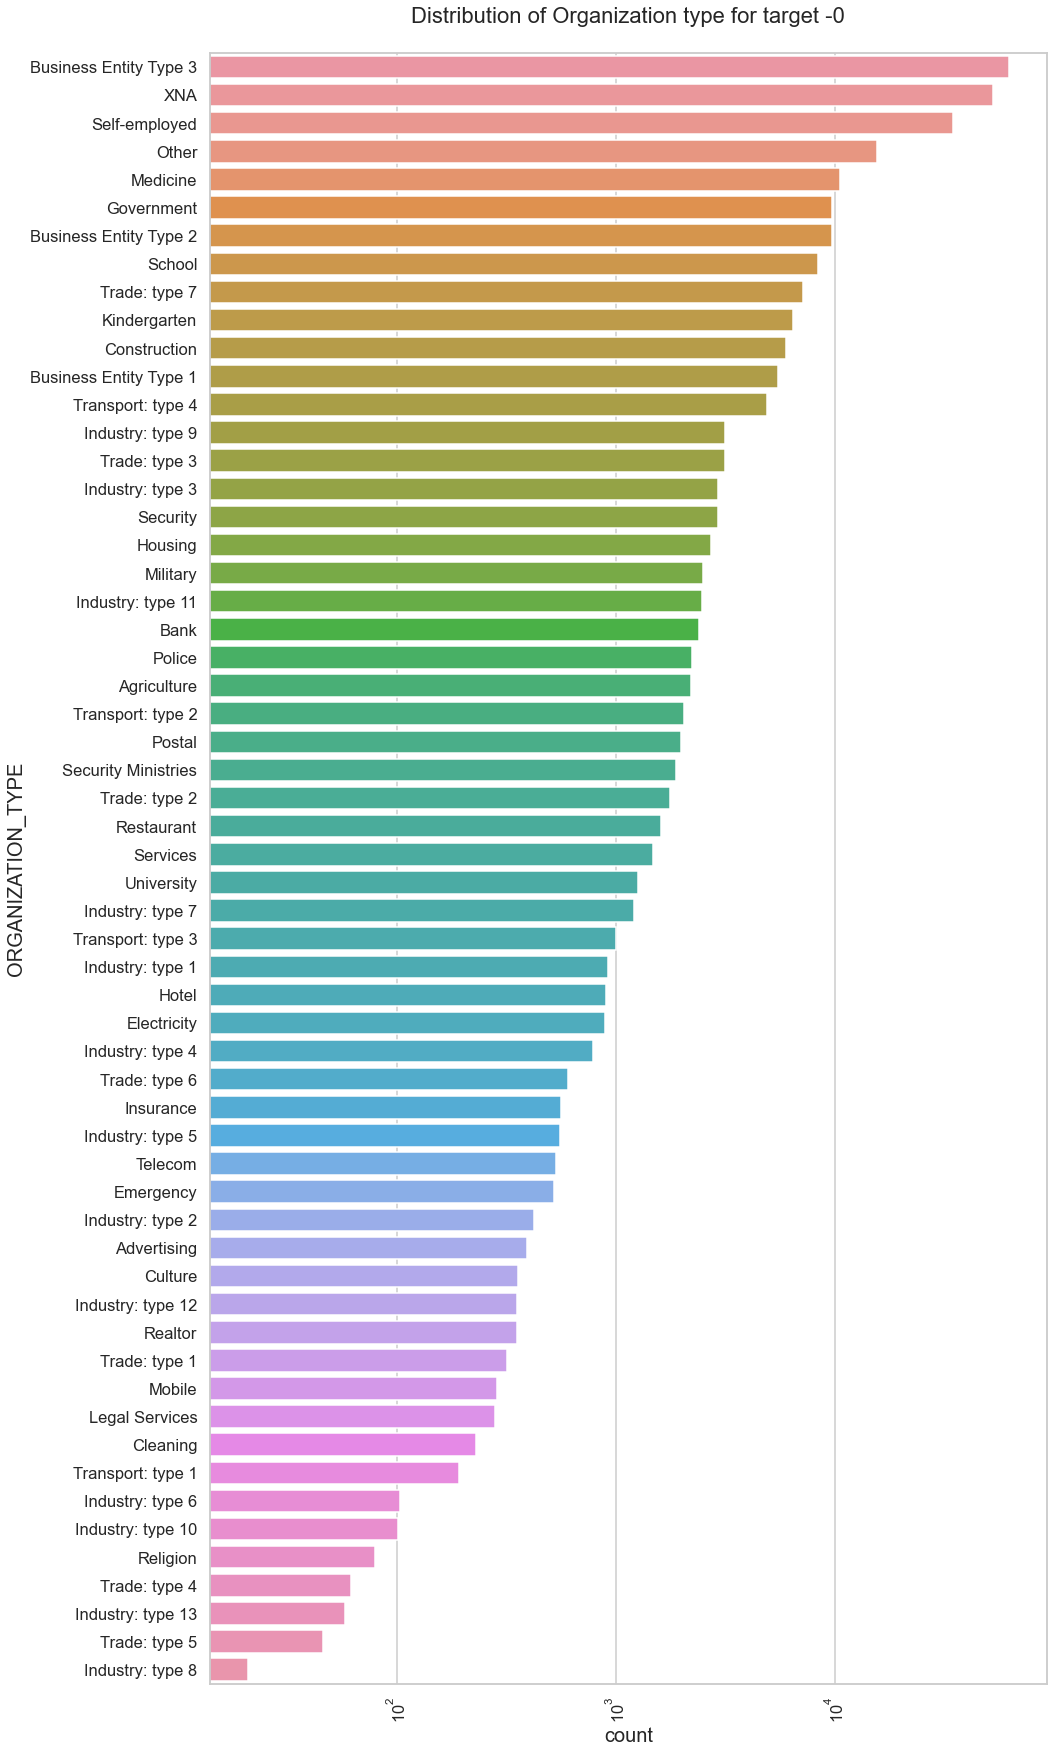

In [131]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target -0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index)

plt.show()

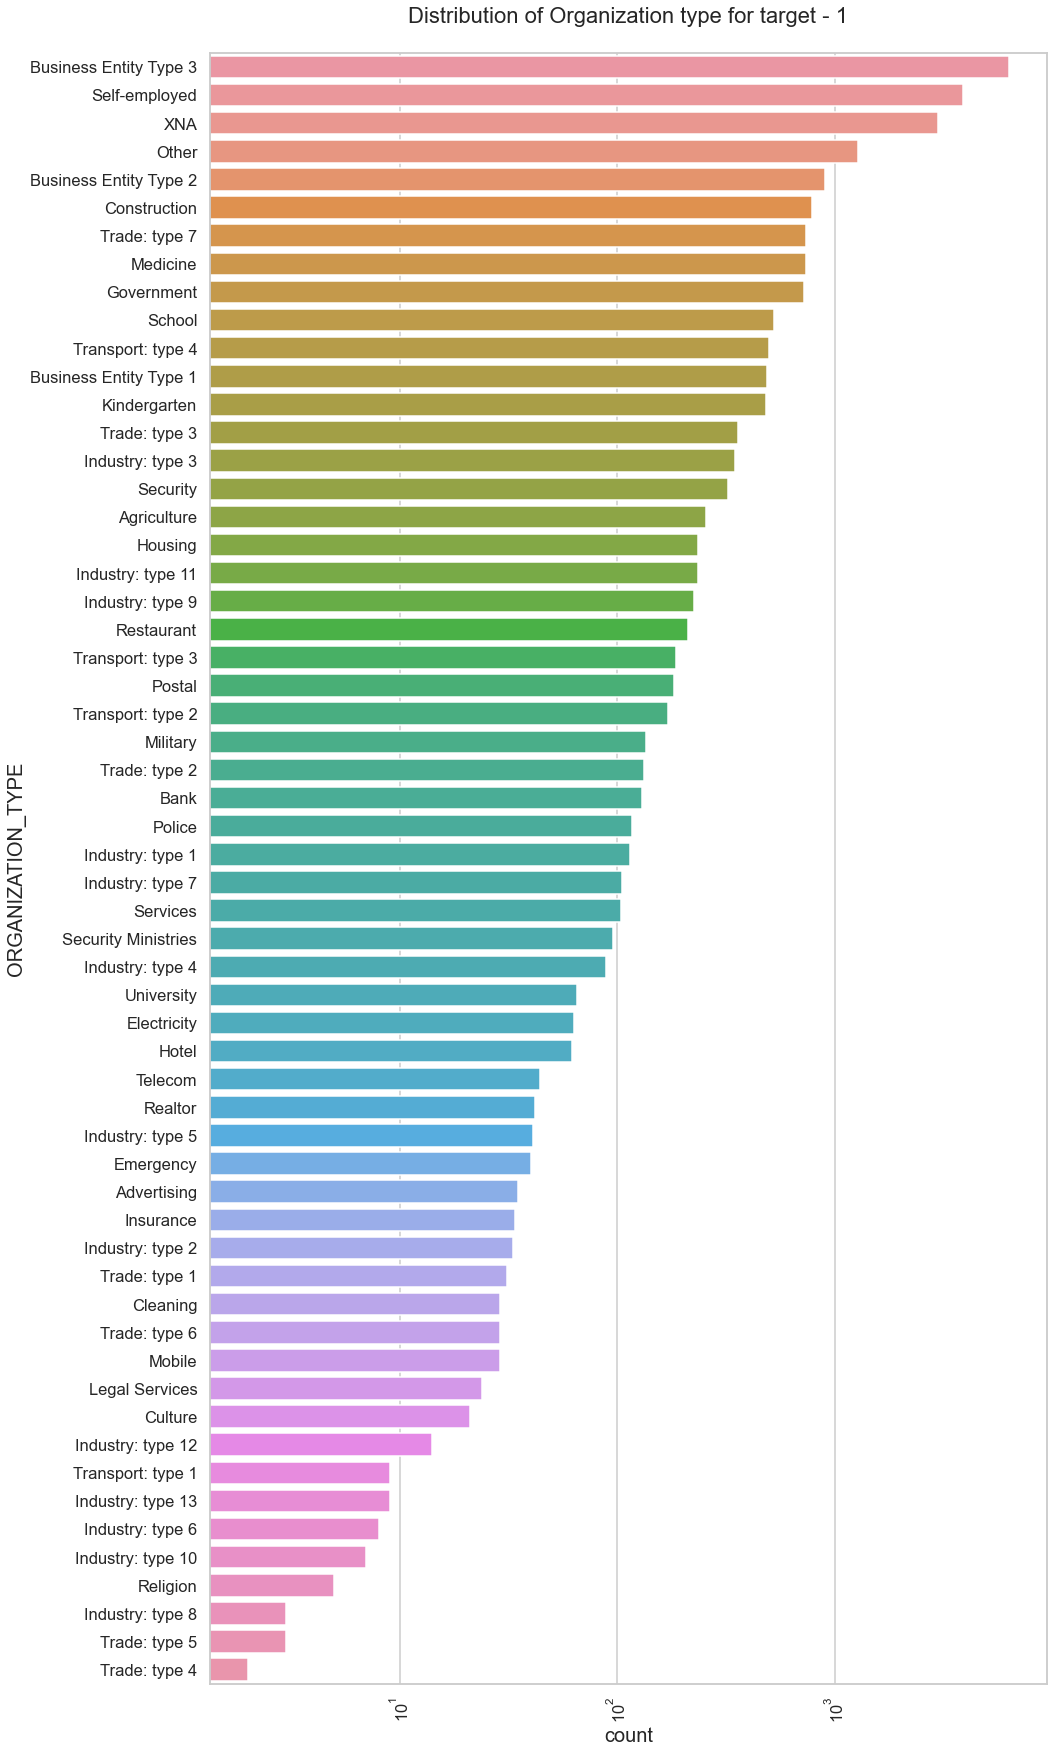

In [132]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target1_df,y='ORGANIZATION_TYPE',order=target1_df['ORGANIZATION_TYPE'].value_counts().index)

plt.show()

`Business Entities, Self-employeed and Construction categories are the top 3 defaulted groups of occupation`

- Bivariate and Segmented bivariate analysis:
    - Gender v/s credit amount
    - Occupation v/s credit
    - contract type v/s credit
    - income type v/s credit amount
    - age v/s credit amount

In [133]:
# Bivariate analysis for variables w.r.t Target 0 & 1 respectively:

In [134]:
result = pd.pivot_table(data=target0_df,index='CODE_GENDER', columns='CREDIT_BUCKET',values='AMT_CREDIT')
result

CREDIT_BUCKET,0-1000000,100000-500000,500001-1000000,1000001-4000000,4000001-10000000
CODE_GENDER,,,,,
F,75290.654738,290801.424424,703038.630523,1.307072e+06,4050000.00
M,74699.058328,297281.321451,706598.013010,1.328922e+06,4046838.75
XNA,NaN,352500.000000,540000.000000,NaN,NaN


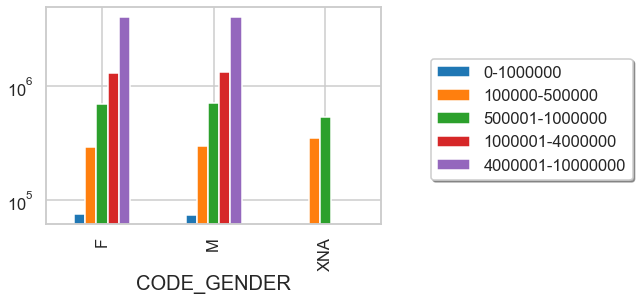

In [135]:
ax = result.plot.bar()
plt.yscale('log')
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

In [136]:
result = pd.pivot_table(data=target1_df,index='CODE_GENDER', columns='CREDIT_BUCKET',values='AMT_CREDIT')
result

CREDIT_BUCKET,0-1000000,100000-500000,500001-1000000,1000001-4000000,4000001-10000000
CODE_GENDER,,,,,
F,78813.447644,304112.019721,685833.804569,1.268492e+06,4027680.0
M,74984.014286,312277.209405,676414.602041,1.260712e+06,NaN


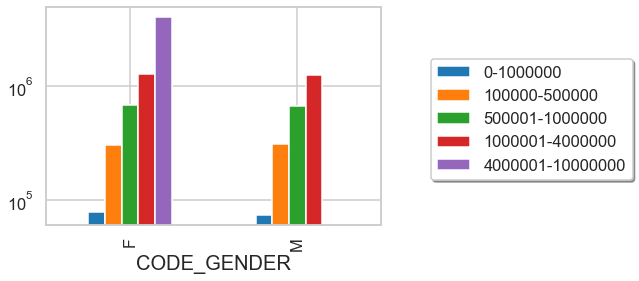

In [137]:
ax = result.plot.bar()
plt.yscale('log')
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

`Remarks: Among the borrowers the distribution of borrowings between F and M are more or less same`

`Distribution of gender v/s income v/s total credit availed can be visualized in the above scatter plot`

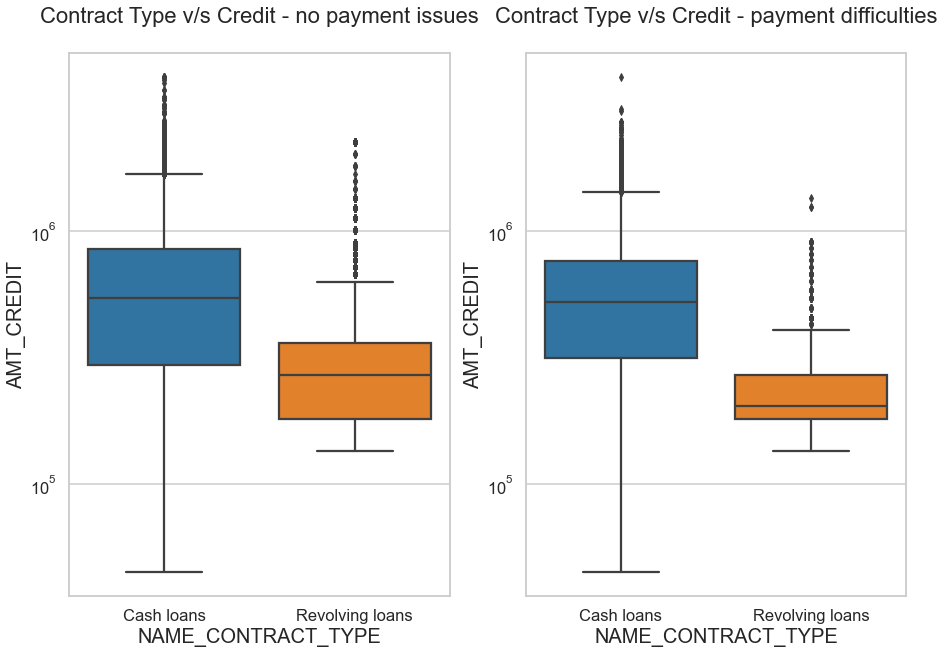

In [138]:
plt.figure(figsize=(15, 10))

# subplot 1: Sales
plt.subplot(1, 2, 1)
sns.boxplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=target0_df)
plt.title("Contract Type v/s Credit - no payment issues")
plt.yscale('log')
# subplot 2: Profit
plt.subplot(1, 2, 2)
sns.boxplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=target1_df)
plt.yscale('log')
plt.title("Contract Type v/s Credit - payment difficulties")

plt.show()

`Remarks: Among the categories of the loans the cash loans seem to be the highest loan amounts disbursed by the company during the tenure. ALso the amount of defaults in target 1 seem be more in Q1 in Cash loans and Q3 in revolving loans.`

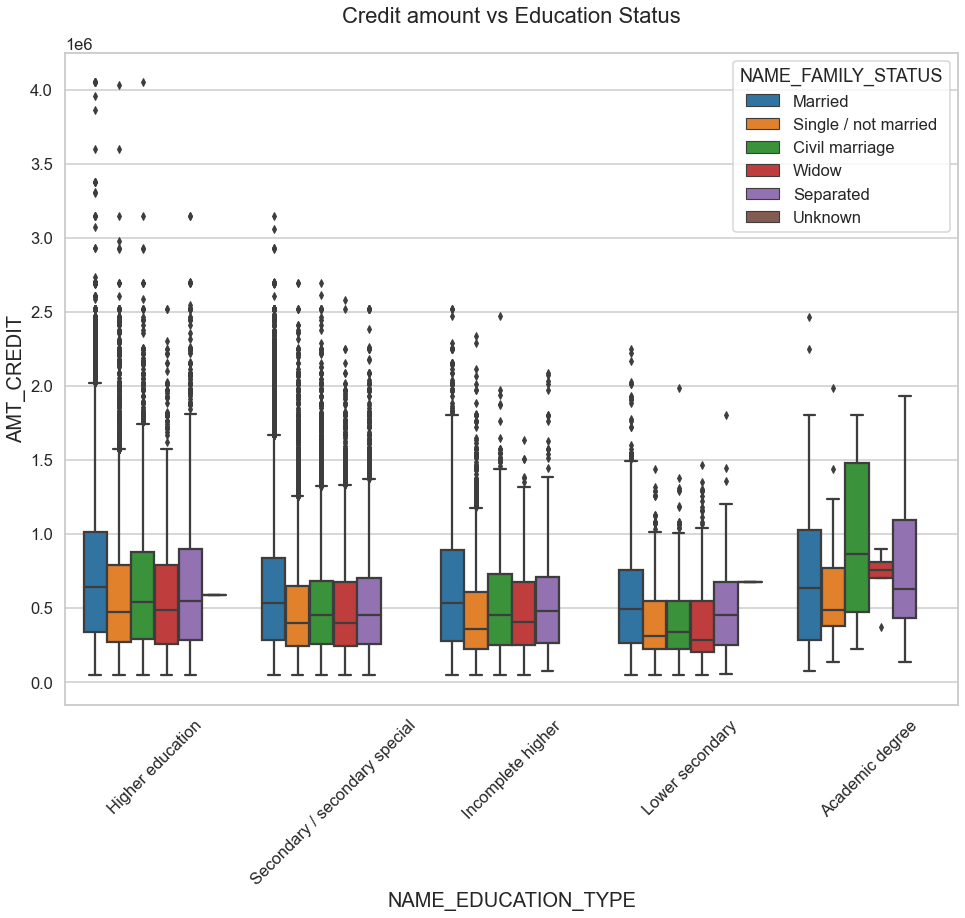

In [139]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.
Civil marriage for Academic degree is having most of the credits in the third quartile.

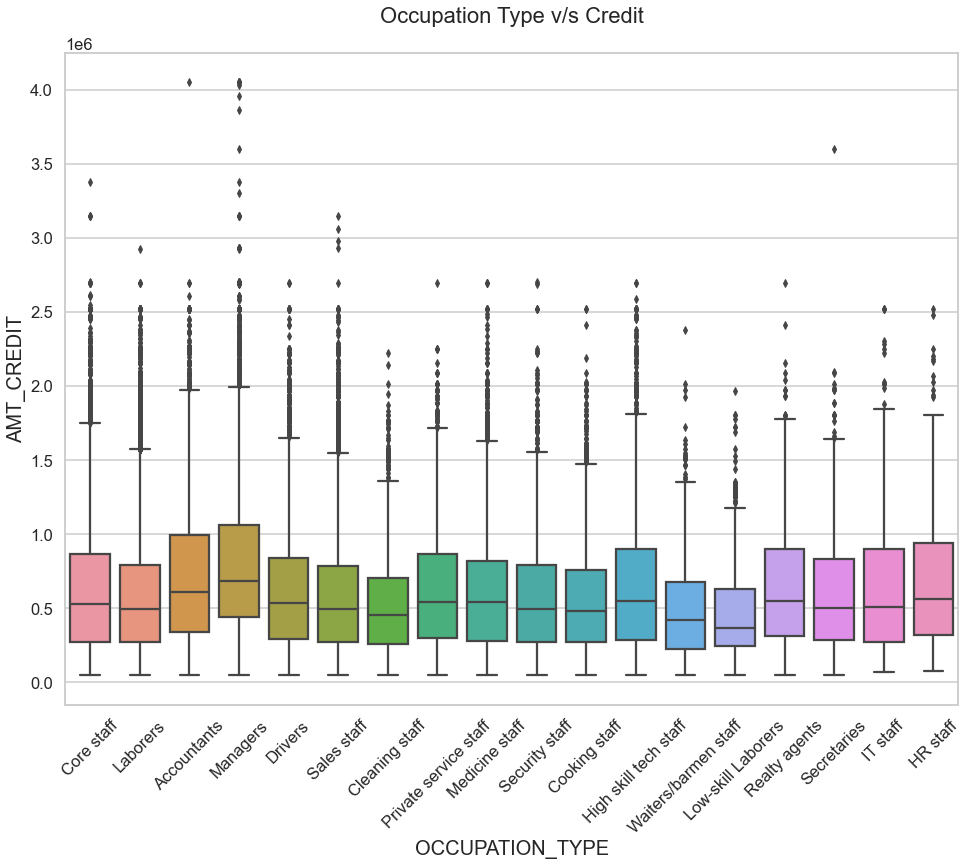

In [140]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='OCCUPATION_TYPE',y='AMT_CREDIT',orient='v')
plt.title('Occupation Type v/s Credit')
plt.show()

`From the above chart we can infer that managers, High skill tech staff, HR staff etc. are the prominent borrowers in target1`

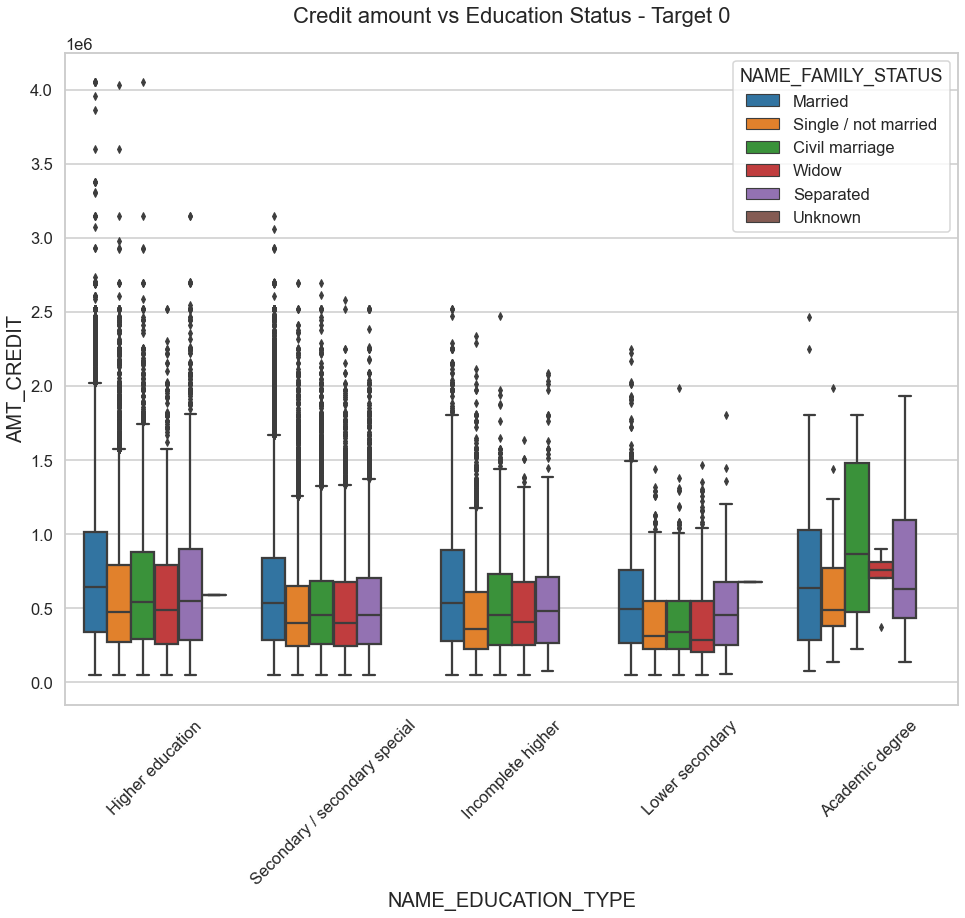

In [141]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status - Target 0')
plt.show()

`Remarks: There seem to be too many outliers in the borrowed credits in case of defaulted customers. Secondary educated + civil marriage customers seem to show too many outliered borrowings.  Academic degree holders who are married top the list of defaulters. Higher educated customers second the list in the order( Married, separated ) Incomplete higher educated customers third the list`

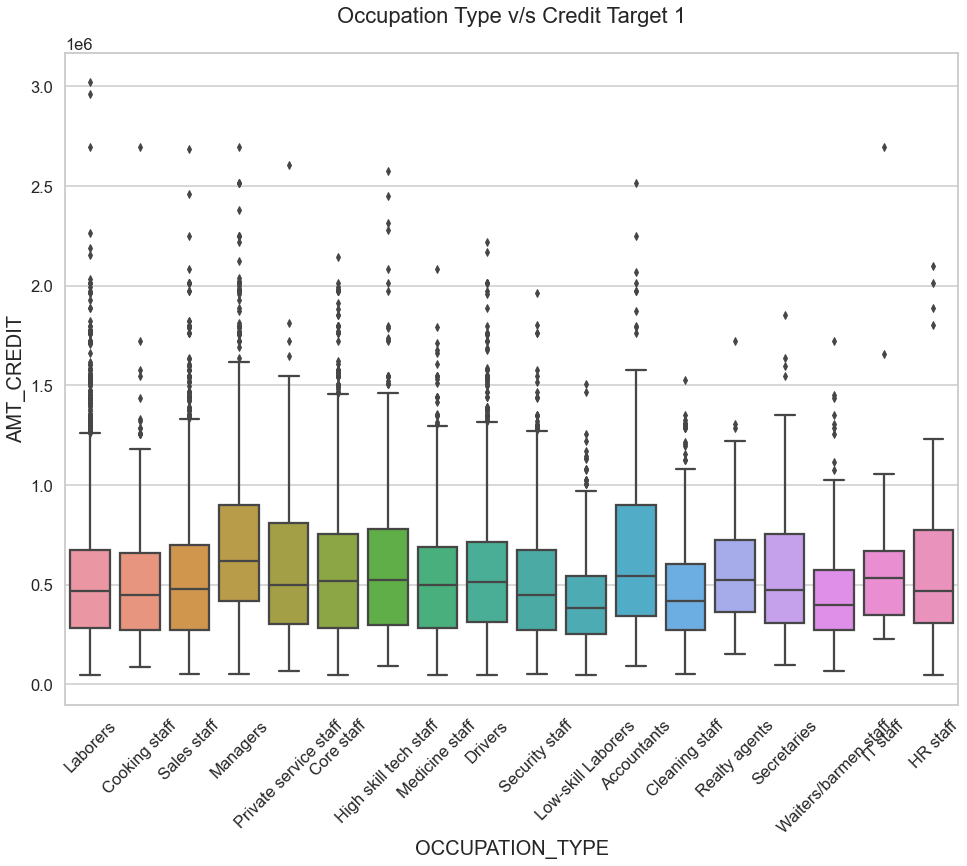

In [142]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1_df, x='OCCUPATION_TYPE',y='AMT_CREDIT',orient='v')
plt.title('Occupation Type v/s Credit Target 1')
plt.show()

`Of the above Accountants by profession top the list of defaulters. followed by Managers and then HR staffs.Among the defaulters there are very high outliers in cases of laborers who have taken very high loan amounts and have defaulted`

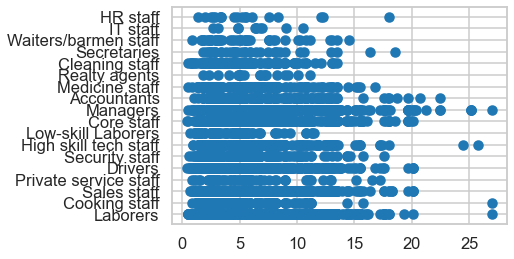

In [143]:
plot1_df=target1_df.dropna()
plt.scatter(plot1_df.AMT_CREDIT/ 10 **5,plot1_df.OCCUPATION_TYPE)
plt.show()

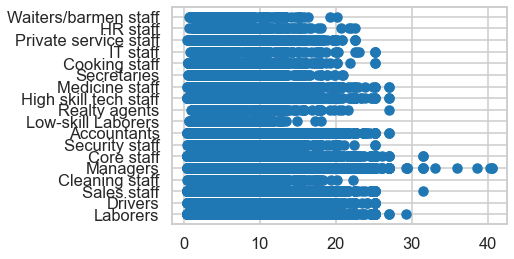

In [144]:
#Occupation v/s credit
#Since occupation type has empty values, we will remove them and plot:
plot0_df=target0_df.dropna()
plt.scatter(plot0_df.AMT_CREDIT / 10 **5,plot0_df.OCCUPATION_TYPE)
plt.show()

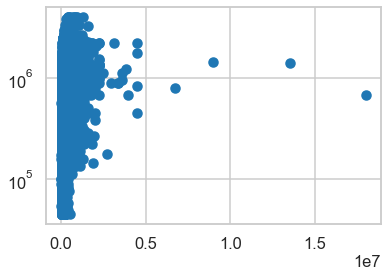

In [145]:
plt.scatter(target0_df.AMT_INCOME_TOTAL,target0_df.AMT_CREDIT)
plt.yscale('log')
plt.show()

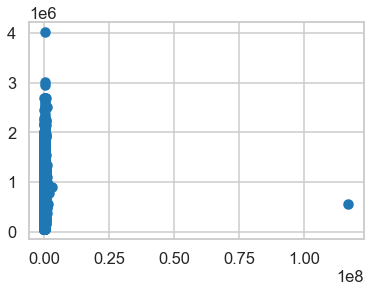

In [146]:
plt.scatter(target1_df.AMT_INCOME_TOTAL,target1_df.AMT_CREDIT)
plt.show()

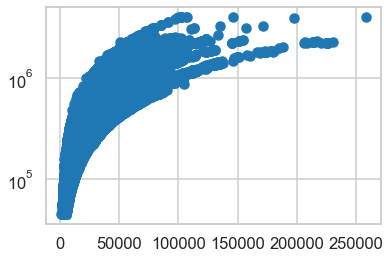

In [147]:
plt.scatter(target0_df.AMT_ANNUITY,target0_df.AMT_CREDIT)
plt.yscale('log')
plt.show()

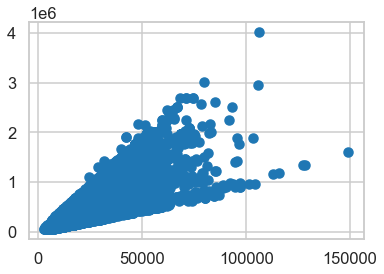

In [148]:
plt.scatter(target1_df.AMT_ANNUITY,target1_df.AMT_CREDIT)
plt.show()

In [149]:
#AMT_GOODS_PRICE vs credit

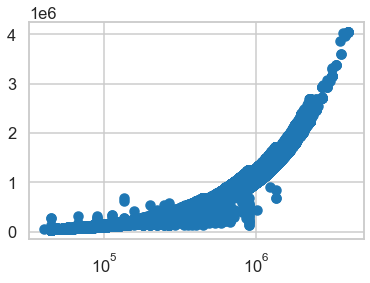

In [150]:
plt.scatter(target0_df.AMT_GOODS_PRICE,target0_df.AMT_CREDIT)
plt.xscale('log')
plt.show()

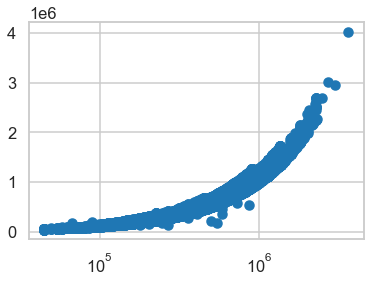

In [151]:
plt.scatter(target1_df.AMT_GOODS_PRICE,target1_df.AMT_CREDIT)
plt.xscale('log')
plt.show()

Arrive at top 5 correlations v/s Target variables, arrive at the correlation table
and pick top 5 from the same for indicating correlated value and arrive at final remarks.

**Correlation Analysis**
**Note: Correlation is handled in two methods**
1. Generate the correlation matrix for the entire datasets for target0 & target1
2. Generate top 10 correlation for both the dataset.

In [152]:
target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')


In [153]:
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.038308,0.002315,0.024767,-0.001293,-0.025551,-0.375639,-0.205693,-0.180517,0.019986,0.001205,0.271736,0.051819,-0.001897,-0.035017,0.027815,0.810519,0.019537,0.017697,0.001725,-0.010738,0.015455,0.021523,0.027788,0.076212,0.071585,-0.016836,-0.046237,0.019630,-0.012052,0.019129,-0.011256,0.019810,-0.011472,-0.009163,0.022537,-0.001278,0.022204,-0.001735,0.009667,0.003624,0.059136,-0.003833,-0.019213,-0.177020,-0.001850,0.060114,-0.001763,-0.003188,-0.003428,0.000879,0.005841,-0.004288,0.004671,0.013153,0.001452,0.006632,0.001064,0.002601,-0.002096,0.001279,0.000760,-0.001295,-0.001233,-0.007722,-0.044217
AMT_INCOME_TOTAL,0.038308,1.000000,0.416017,0.485699,0.419929,0.097772,-0.093515,-0.095898,-0.076387,-0.035931,0.000944,0.200203,-0.054858,-0.009861,-0.012279,0.096403,0.044988,-0.209520,-0.229681,0.102384,0.078372,0.161441,0.148976,0.020368,0.040087,0.040321,0.179813,-0.094709,0.050729,0.166578,0.045843,0.158866,0.049952,0.164136,0.133829,-0.028989,-0.032758,-0.028726,-0.033948,0.063206,-0.004177,-0.007432,0.000723,0.002910,-0.142275,0.000407,0.186816,0.038877,0.002197,0.001870,0.003716,0.048012,0.039610,0.024496,0.019586,0.007424,0.002745,0.008592,0.003183,-0.000926,0.002692,0.006026,0.009407,0.073695,0.027426,0.061557
AMT_CREDIT,0.002315,0.416017,1.000000,0.831900,0.985510,0.053570,0.057151,0.017986,-0.009416,0.001982,0.001521,0.075798,-0.029547,0.028357,0.017486,0.015094,0.079496,-0.087614,-0.097047,0.051370,0.019093,0.045430,0.047740,-0.026649,-0.012662,0.006972,0.128370,0.018912,0.036187,0.081215,0.033922,0.078628,0.035878,0.080482,0.066368,0.003045,-0.015646,0.003122,-0.018724,0.077383,0.005124,0.131550,-0.001342,-0.012496,-0.047411,-0.005766,0.080510,0.018376,-0.003434,0.002739,0.003498,0.037314,0.033182,0.023586,0.049277,0.007267,0.024189,0.017017,0.023475,-0.020882,-0.003655,0.000362,-0.004833,0.045454,0.024427,-0.035046
AMT_ANNUITY,0.024767,0.485699,0.831900,1.000000,0.830368,0.058591,-0.011740,-0.030195,-0.037717,-0.016569,-0.000193,0.118423,-0.027053,0.027209,0.006308,0.063476,0.096422,-0.116841,-0.130760,0.054189,0.035823,0.075783,0.073054,-0.004963,0.009717,0.019451,0.129342,0.014992,0.038466,0.105791,0.035511,0.101783,0.037936,0.104557,0.083607,-0.009432,-0.018551,-0.009206,-0.020812,0.068008,0.001740,0.150734,-0.000695,-0.008993,-0.080912,-0.006175,0.130272,0.030948,-0.004078,-0.016882,0.001400,0.019494,0.021752,0.012469,0.003474,0.001659,-0.016307,0.004666,0.011397,-0.023413,0.003495,0.002631,0.011853,0.050662,0.022429,0.001119
AMT_GOODS_PRICE,-0.001293,0.419929,0.985510,0.830368,1.000000,0.062650,0.058256,0.022659,-0.009528,0.004018,0.001442,0.073678,-0.012353,0.025379,0.031763,0.014403,0.079388,-0.089794,-0.098739,0.058906,0.020410,0.046406,0.04

In [154]:
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.004749,0.000200,0.033679,-0.007572,-0.031628,-0.267862,-0.127943,-0.133658,0.027320,NaN,0.216518,0.043404,0.002769,-0.030258,0.017918,0.823307,0.041631,0.043367,-0.022469,-0.025824,-0.019571,-0.009823,0.004127,0.047486,0.051352,-0.016084,-0.022055,0.001679,-0.023026,0.003727,-0.021876,0.000742,-0.022697,-0.023909,0.032070,-0.003351,0.031274,-0.005607,-0.012812,-0.008766,0.070052,NaN,-0.026862,-0.145001,-0.000796,0.027923,-0.000473,NaN,-0.007744,NaN,0.002666,-0.005672,0.010306,-0.007658,-0.006198,0.007484,-0.002592,0.000519,0.005621,0.000564,-0.011009,-0.004516,-0.013416,-0.015320,-0.036691
AMT_INCOME_TOTAL,-0.004749,1.000000,0.359276,0.431617,0.362780,0.051463,0.007238,-0.036127,-0.036671,0.005929,NaN,0.136230,-0.095701,0.000330,-0.023726,0.095398,0.003867,-0.157085,-0.174307,0.088174,0.076449,0.156053,0.144970,0.008996,0.027994,0.030864,0.146165,-0.067438,0.035799,0.126370,0.029706,0.122477,0.033996,0.126067,0.099516,0.000630,-0.019355,0.000674,-0.023345,0.081241,-0.000594,0.007852,NaN,-0.003327,-0.106840,-0.004059,0.158332,0.036584,NaN,0.001339,NaN,0.026260,0.029081,0.009874,0.018201,-0.002113,-0.019868,0.001599,-0.003761,-0.001245,0.010661,-0.002371,0.018841,0.079795,0.025086,0.081913
AMT_CREDIT,0.000200,0.359276,1.000000,0.811443,0.977224,0.039919,0.155216,0.082434,0.017099,0.053780,NaN,0.000857,-0.074470,0.039054,-0.003443,0.012086,0.067447,-0.047654,-0.059218,0.028537,0.014192,0.030331,0.032564,-0.028544,-0.029571,-0.011182,0.112645,0.072975,0.013482,0.072468,0.010041,0.072482,0.013063,0.073396,0.058141,0.018355,-0.021987,0.018215,-0.029011,0.098580,0.020159,0.101969,NaN,-0.017864,-0.000567,-0.016317,0.057303,0.018706,NaN,-0.004883,NaN,0.010145,0.038677,0.014853,0.033110,-0.001639,0.004085,0.006804,0.014907,-0.030095,0.002944,-0.004877,0.002992,0.044705,-0.019015,-0.026472
AMT_ANNUITY,0.033679,0.431617,0.811443,1.000000,0.804931,0.023297,0.030483,-0.003396,-0.035900,0.014472,NaN,0.088468,-0.050791,0.038179,-0.017713,0.066231,0.088604,-0.057905,-0.072974,0.032083,0.030930,0.063880,0.062370,-0.002849,0.007397,0.014922,0.111202,0.037340,0.016505,0.083384,0.011199,0.082145,0.015977,0.084384,0.060715,0.007430,-0.020239,0.008253,-0.026831,0.074302,0.015638,0.131613,NaN,-0.012769,-0.066074,-0.017388,0.114043,0.028723,NaN,-0.014338,NaN,-0.005702,0.020491,0.007947,-0.009886,-0.005388,-0.039678,-0.003412,0.001043,-0.032648,0.014390,-0.004444,0.030202,0.065508,-0.003439,-0.005174
AMT_GOODS_PRICE,-0.007572,0.362780,0.977224,0.804931,1.000000,0.054140,0.157778,0.092648,0.019172,0.059736,NaN,-0.005887,-0.049366,0.036197,0.015831,0.014149,0.064627,-0.056462,-0.067315,0.040029,0.016977,0.033732,0.034991,-0.030182,-0.032558,-0.012560,0.124436,0.078749,0.022270,0.081076,0.018

`Above is the correlation of the entire data set for target 0, out of which we can choose those parameters which make sense in defining a valid correlation (not spurious ones)`

**Some inferences from above matrix:**<br>
**Target-0:**
- Good price v/s credit applied is showing a very strong correlation of 0.98.
- indicating that the credit provided by bank is very close to actual cost declared for goods.
- count of children and credit applied show negative correlation - possibly indicate that
- families with more children may be applying for lesser loans.?
- income v/s credit shows a 0.4 correlation indicating a strong correlation - this mean
- that the lending company has been successful in providing loans in respect to salary / income 
- and not leading to subprime lending.<br>


**Target-1:**
- in cases where there were customers with payment difficulties,
- Days employed and credit provided show a very weak correlation 
- family members and total income show negative correlation - this could be a potential indicator
- that income v/s family size has a deficit leading to more borrowings and in turn leading to defaulted payments.



In [155]:
# generate the correlation matrix for the entire DF and arrive at top 10 correlation
corr0 = target0_df.corr()
corr0 = corr0.where( np.triu(np.ones(corr0.shape),k=1).astype(bool))
corrdf0 = corr0.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace=True)
corrdf0['Correlation'] = round(corrdf0['Correlation'],2)
corrdf0['Correlation'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by ='Correlation', ascending=False,inplace=True)

In [156]:
# generate the correlation matrix for the entire DF and arrive at top 10 correlation
corr1 = target1_df.corr()
corr1 = corr1.where( np.triu(np.ones(corr1.shape),k=1).astype(bool))
corrdf1 = corr1.unstack().reset_index()
corrdf1.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf1.dropna(subset = ['Correlation'], inplace=True)
corrdf1['Correlation'] = round(corrdf1['Correlation'],2)
corrdf1['Correlation'] = corrdf1['Correlation'].abs()
corrdf1.sort_values(by ='Correlation', ascending=False,inplace=True)

`Looking at the above correlation top 10 can be picked up but it appears that even though the top 10 are available but they may not impact our analysis`

In [157]:
corrdf0.head(10)

,VAR1,VAR2,Correlation
2411,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
893,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
2689,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
2413,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
2275,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
2342,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.99
412,AMT_GOODS_PRICE,AMT_CREDIT,0.99
2206,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.97
2344,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.96
1379,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95


In [158]:
corrdf1.head(10)

,VAR1,VAR2,Correlation
2411,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
2689,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
893,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
2342,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,1.00
2413,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
2275,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
412,AMT_GOODS_PRICE,AMT_CREDIT,0.98
2206,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.98
2344,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.98
1379,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96


In [159]:
#Variables with highest correlation are same in both files.

`One strong identifiable correlation is the goods price v/s credit is strong correlated in target=0 and target=1'

Step 3: perform clean up on Previous data set [fix any date columns]

In [160]:
#read the previous dataset
previous = pd.read_csv('previous_application.csv')

In [161]:
#get the previous data'set info,shape and description!
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

`Upon inspection, looks like there are no visible data type mismatch`

In [162]:
previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [163]:
previous.shape

(1670214, 37)

In [164]:
##Data Quality check and Missing Values

#Percentage of missing values for all columns:

round(100*(previous.isnull().sum()/len(previous)), 2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [165]:
#Removing columns with >50% null values

In [166]:
previous.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)
previous.shape

(1670214, 33)

In [167]:
#Correcting negative columns:
previous.loc[previous['DAYS_DECISION']<0,'DAYS_DECISION'] = previous.DAYS_DECISION * -1
previous.loc[previous['SELLERPLACE_AREA']<0,'SELLERPLACE_AREA'] = previous.SELLERPLACE_AREA * -1
previous.loc[previous['DAYS_FIRST_DRAWING']<0,'DAYS_FIRST_DRAWING'] = previous.DAYS_FIRST_DRAWING * -1
previous.loc[previous['DAYS_FIRST_DUE']<0,'DAYS_FIRST_DUE'] = previous.DAYS_FIRST_DUE * -1
previous.loc[previous['DAYS_LAST_DUE_1ST_VERSION']<0,'DAYS_LAST_DUE_1ST_VERSION'] = previous.DAYS_LAST_DUE_1ST_VERSION * -1
previous.loc[previous['DAYS_LAST_DUE']<0,'DAYS_LAST_DUE'] = previous.DAYS_LAST_DUE * -1
previous.loc[previous['DAYS_TERMINATION']<0,'DAYS_TERMINATION'] = previous.DAYS_TERMINATION * -1

In [168]:
previous.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0


In [169]:
new_appl.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_BUCKET,INCOME_BUCKET
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,100000-500000,200000-225000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1000001-4000000,250000-275000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,100000-500000,50000-75000


Step 4: Merge data sets together [left outward? or rightward? basis of SK_ID_CURR]

In [170]:
# Now merging the Application dataset with previous appliaction dataset
Final_df=pd.merge(new_appl,previous,how='inner',on='SK_ID_CURR')
Final_df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_BUCKET,INCOME_BUCKET,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,100000-500000,200000-225000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1000001-4000000,250000-275000,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1000001-4000000,250000-275000,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Family,Refreshed

In [171]:
Final_df.shape

(1413701, 115)

In [172]:
# Renaming the column names after merging

Final_df = Final_df.rename({'NAME_CONTRACT_TYPE_x' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_x':'AMT_CREDIT','AMT_ANNUITY_x':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_x' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_x':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDIT_y':'AMT_CREDIT_PREV','AMT_ANNUITY_y':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_START_y':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_START_y':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [173]:
Final_df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [174]:
Final_df.shape

(1413701, 102)

In [175]:
Final_df.head(10)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_BUCKET,INCOME_BUCKET,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,100000-500000,200000-225000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1000001-4000000,250000-275000,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1000001-4000000,250000-275000,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0

perform univariate and bivariate analysis w.r.t NAME_CONTRACT_STATUS

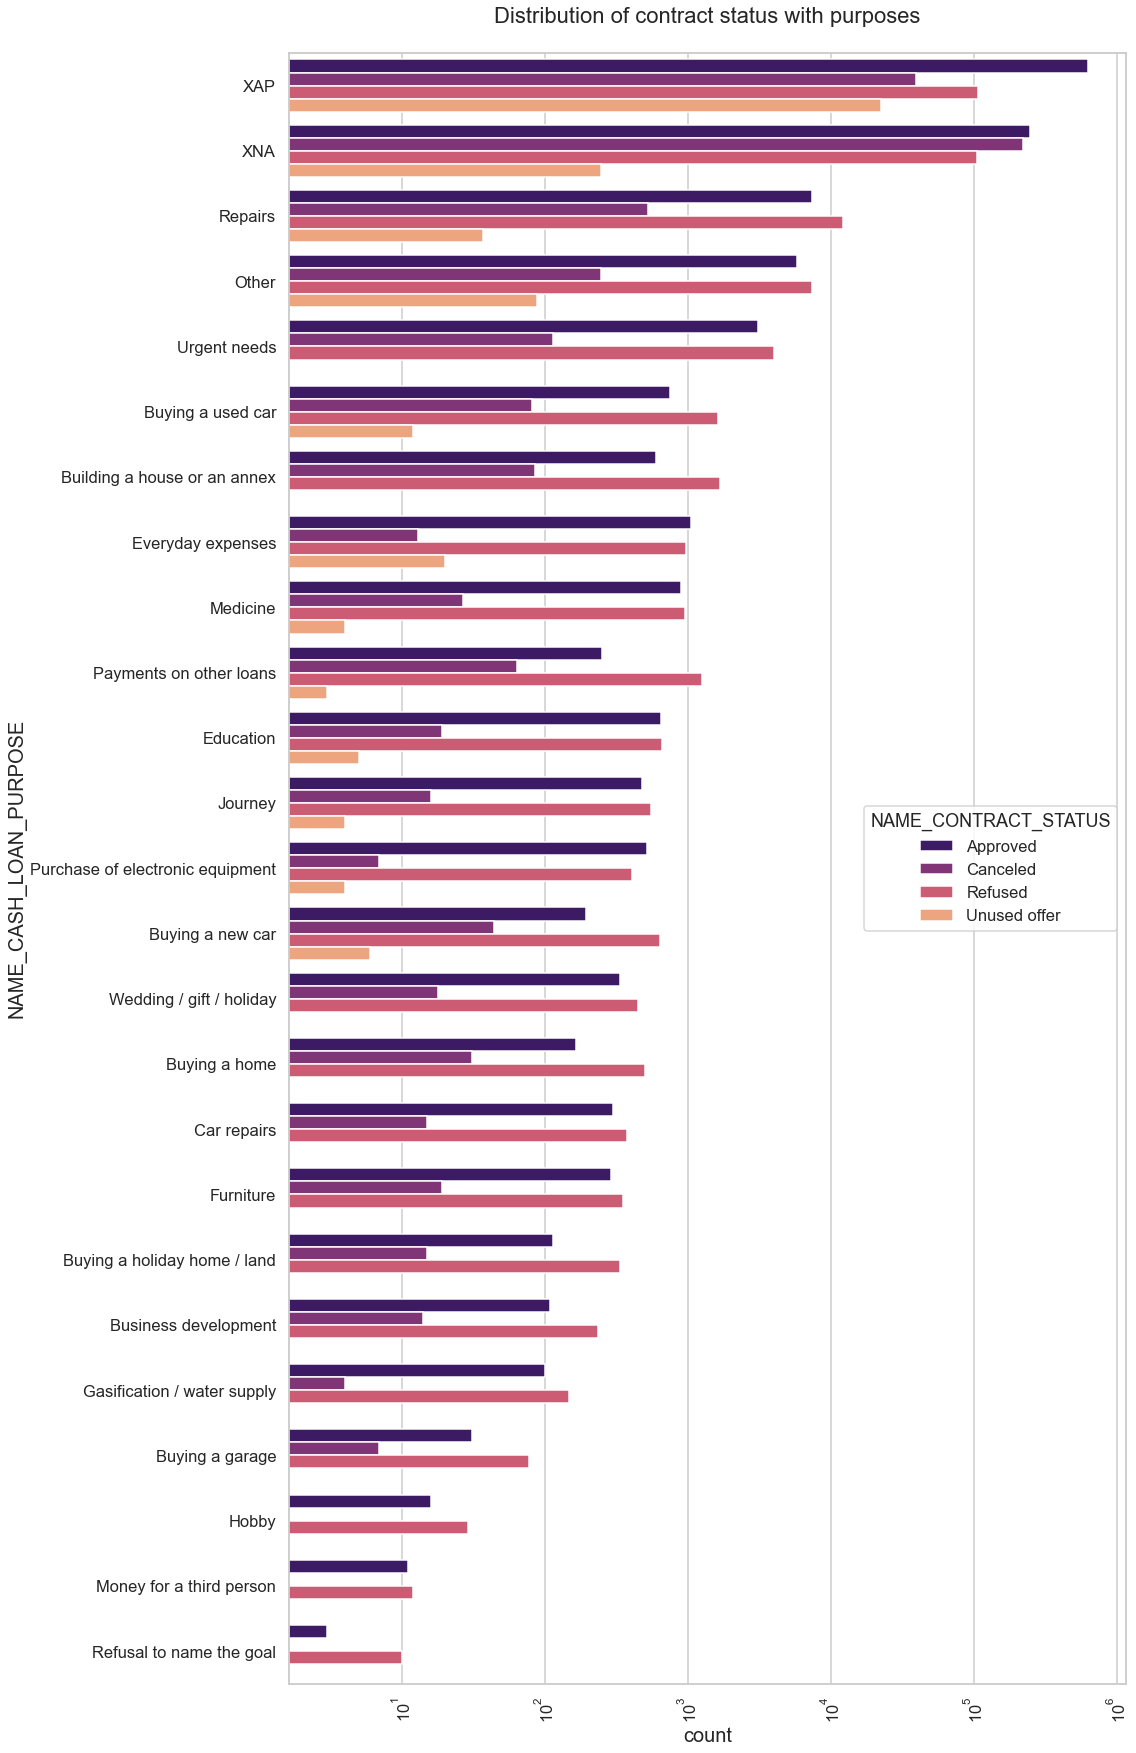

In [176]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = Final_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=Final_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

##### Points to be concluded from above plot:

Most rejection of loans came from purpose 'repairs'.
For education purposes we have equal number of approves and rejection
Paying other loans and buying a new car is having significant higher rejection than approves.

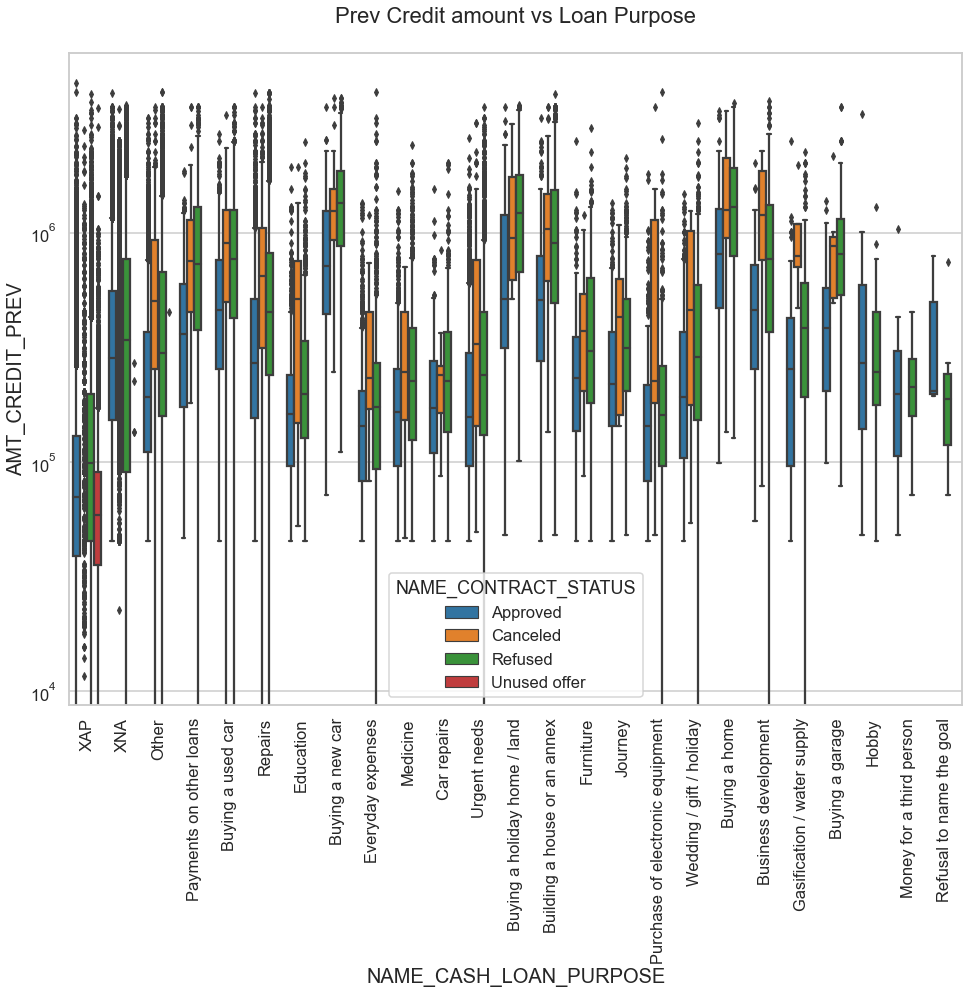

In [177]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =Final_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

From the above we can conclude some points-

The credit amount of Loan purposes like 'Buying a home','Business Development','Buying a holiday home/land','Building a house' and 'Buying a new car' is higher.
More loans are approved for buying holiday home/land.
Money for third person or a Hobby is having less credits applied for.

In [ ]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =Final_df, x='NAME_HOUSING_TYPE',hue='NAME_CONTRACT_STATUS',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Housing type')
plt.show()

More loans are approved for house/apartments

In [ ]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =Final_df, x='OCCUPATION_TYPE',hue='NAME_CONTRACT_STATUS',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs OCCUPATION')
plt.show()

In [ ]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with Occupaton Types')
ax = sns.countplot(data = Final_df, y= 'ORGANIZATION_TYPE', 
                   order=Final_df['ORGANIZATION_TYPE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

## Conclusions

To safe guard the interest of the lending company, it could be advisable that the lending company should look at:

- Collateral based lending or mortgage based lending like real estate, housing etc. 
- Look at borrowers who have families and are earning class.
- Ensure that Income of the borrower v/s Credit applied for shows a high correlation, i.e. not to lend beyond earnings or income class.
- Working class in the groups of high tech skilled staff, Management, Accounts, Laborers are to be evaluated carefully before approving the loans.
- Lending v/s gender show that the female customers show difficulties in repayment and when looked upon into the earnings, the female and male customers in the region of 1.25 L to 1.5L. Lending company may need to investigate in this area for restricting the loan amounts to a certain capping.
- Education levels of the customers who have only Secondary education or lesser show more tendency to default followed by Higher education and / or academic education. This indicate that a secondary educated customer may have challenges repaying if he is working. Loans should be restricted possibly to such customers. 
- Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.
- Loans for “Repairs” purpose have highest unsuccessful payments on time. Bank should consider it while taking decision.
